# Team number: 26
# FULL names: Ngoc Mai Luu, Catherine Mendoza, Thao My Nguyen, Bea Pamuspusan
# Student ID numbers: 49120891, 49041924, 48741426, 48757489

Acknowledgement Statement by students: <br>
Please keep one acknowledgment from the following<br>
	We acknowledge that we have only used GenAI (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment 

# Answer to Section 1: Clean the dataset  (in this section, insert as many cells as needed) 

In [4]:
# Import all libraries

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [5]:
# Load both datasets
data1 = pd.read_csv('Dataset1.csv', encoding='latin1')
data2 = pd.read_csv('Dataset2.csv', encoding='latin1')

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/2219445303.py:2: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('Dataset1.csv', encoding='latin1')
/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/2219445303.py:3: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('Dataset2.csv', encoding='latin1')


In [6]:
# Combine the two datasets into one
combined = pd.concat([data1, data2], ignore_index=True)

In [7]:
# Check dataset shape

print(combined.shape)

(1988382, 34)


In [8]:
# Check dataset info

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           float64
 1   company_code              float64
 2   customer_code             object 
 3   customer_district_code    float64
 4   item_code                 object 
 5   business_area_code        object 
 6   item_group_code           object 
 7   item_class_code           object 
 8   item_type                 float64
 9   bonus_group_code          object 
 10  environment_group_code    object 
 11  technology_group_code     object 
 12  commission_group_code     object 
 13  reporting_classification  object 
 14  light_source              object 
 15  warehouse_code            object 
 16  abc_class_code            object 
 17  abc_class_volume          object 
 18  business_chain_l1_code    object 
 19  business_chain_l1_name    object 
 20  contact_method_code     

In [9]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date                   8
company_code                     19
customer_code                    11
customer_district_code            9
item_code                         6
business_area_code                6
item_group_code                   7
item_class_code                  15
item_type                        86
bonus_group_code                 16
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   15
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            7
business_chain_l1_name           11
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    2
value_price_adjustment      

In [10]:
#Drop item_source_class sicne all rows are null

combined = combined.drop(columns=['item_source_class'])

In [11]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date              8
company_code                19
customer_code               11
customer_district_code       9
item_code                    6
business_area_code           6
item_group_code              7
item_class_code             15
item_type                   86
bonus_group_code            16
environment_group_code      28
technology_group_code       17
commission_group_code       21
reporting_classification    19
light_source                12
warehouse_code              15
abc_class_code              17
abc_class_volume             5
business_chain_l1_code       7
business_chain_l1_name      11
contact_method_code          9
salesperson_code            19
order_type_code             17
market_segment               5
value_sales                  2
value_cost                   0
value_quantity               2
value_price_adjustment       1
currency                     0
invoice_number               1
line_number                  2
customer_order_number        1
dss_upda

In [12]:
# Strip leading and trailing whitespace in all object (string) columns to clean up category formatting and ensure no unintended null values remain.

for col in combined.select_dtypes(include='object').columns:
    combined[col] = combined[col].str.strip()

In [13]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date                   8
company_code                     19
customer_code                475147
customer_district_code            9
item_code                    229382
business_area_code                6
item_group_code                   7
item_class_code                  15
item_type                        86
bonus_group_code                 16
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   15
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            7
business_chain_l1_name           11
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    2
value_price_adjustment      

In [14]:
#Check dataset info

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           float64
 1   company_code              float64
 2   customer_code             object 
 3   customer_district_code    float64
 4   item_code                 object 
 5   business_area_code        object 
 6   item_group_code           object 
 7   item_class_code           object 
 8   item_type                 float64
 9   bonus_group_code          object 
 10  environment_group_code    object 
 11  technology_group_code     object 
 12  commission_group_code     object 
 13  reporting_classification  object 
 14  light_source              object 
 15  warehouse_code            object 
 16  abc_class_code            object 
 17  abc_class_volume          object 
 18  business_chain_l1_code    object 
 19  business_chain_l1_name    object 
 20  contact_method_code     

In [15]:
#Converting accounting_date datatype from float to datetime

#Drop rows where accounting_date is null
combined = combined.dropna(subset=['accounting_date'])

#Convert to integer first to ensure each accounting_date value has 8 digits and can be converted to datetime.
combined['accounting_date'] = combined['accounting_date'].astype(int)

In [16]:
#Check dataset info to check conversion is correct

combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988374 entries, 1 to 1988381
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   company_code              float64
 2   customer_code             object 
 3   customer_district_code    float64
 4   item_code                 object 
 5   business_area_code        object 
 6   item_group_code           object 
 7   item_class_code           object 
 8   item_type                 float64
 9   bonus_group_code          object 
 10  environment_group_code    object 
 11  technology_group_code     object 
 12  commission_group_code     object 
 13  reporting_classification  object 
 14  light_source              object 
 15  warehouse_code            object 
 16  abc_class_code            object 
 17  abc_class_volume          object 
 18  business_chain_l1_code    object 
 19  business_chain_l1_name    object 
 20  contact_method_code       obj

In [17]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date                   0
company_code                     19
customer_code                475142
customer_district_code            7
item_code                    229382
business_area_code                5
item_group_code                   7
item_class_code                  14
item_type                        85
bonus_group_code                 15
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   14
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            6
business_chain_l1_name           10
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    1
value_price_adjustment      

In [18]:
# Check length of each accounting_date and count how many are not 8 digits
invalid_lengths = combined['accounting_date'].astype(str).apply(len) != 8
print("Rows with invalid accounting_date length:", invalid_lengths.sum())

# Preview a few problematic rows
combined[invalid_lengths][['accounting_date']].head()

Rows with invalid accounting_date length: 0


,accounting_date


In [19]:
#Convert account_date from int64 to datetime
combined['accounting_date'] = pd.to_datetime(combined['accounting_date'], format='%Y%m%d', errors='coerce')

In [20]:
# Check dataset info

combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988374 entries, 1 to 1988381
Data columns (total 33 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              float64       
 2   customer_code             object        
 3   customer_district_code    float64       
 4   item_code                 object        
 5   business_area_code        object        
 6   item_group_code           object        
 7   item_class_code           object        
 8   item_type                 float64       
 9   bonus_group_code          object        
 10  environment_group_code    object        
 11  technology_group_code     object        
 12  commission_group_code     object        
 13  reporting_classification  object        
 14  light_source              object        
 15  warehouse_code            object        
 16  abc_class_code            object        
 17  abc_class_vol

In [21]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date                2552
company_code                     19
customer_code                475142
customer_district_code            7
item_code                    229382
business_area_code                5
item_group_code                   7
item_class_code                  14
item_type                        85
bonus_group_code                 15
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   14
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            6
business_chain_l1_name           10
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    1
value_price_adjustment      

In [22]:
# Check datetime conversion that failed
combined[combined['accounting_date'].isnull()][['accounting_date']]

,accounting_date
204,NaT
646,NaT
999,NaT
1740,NaT
2172,NaT
...,...
534244,NaT
534337,NaT
534489,NaT
535073,NaT


In [23]:
# Count total NaT values in accounting_date

combined['accounting_date'].isnull().sum()

2552

In [24]:
# Check dataset shape

print(combined.shape)

(1988374, 33)


In [25]:
# Drop rows with missing or invalid accounting_date values, as these only account for 2,552 rows (about 0.13%) out of the 1.9M rows

combined = combined.dropna(subset=['accounting_date'])

In [26]:
# Check dataset shape

print(combined.shape)

(1985822, 33)


In [27]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date                   0
company_code                     19
customer_code                472862
customer_district_code            7
item_code                    228220
business_area_code                5
item_group_code                   7
item_class_code                  14
item_type                        85
bonus_group_code                 15
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   14
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            6
business_chain_l1_name           10
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    1
value_price_adjustment      

In [28]:
# Check dataset info

combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1985822 entries, 1 to 1988381
Data columns (total 33 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              float64       
 2   customer_code             object        
 3   customer_district_code    float64       
 4   item_code                 object        
 5   business_area_code        object        
 6   item_group_code           object        
 7   item_class_code           object        
 8   item_type                 float64       
 9   bonus_group_code          object        
 10  environment_group_code    object        
 11  technology_group_code     object        
 12  commission_group_code     object        
 13  reporting_classification  object        
 14  light_source              object        
 15  warehouse_code            object        
 16  abc_class_code            object        
 17  abc_class_vol

In [29]:
#Check unique value of 

combined['item_type'].unique()

array([nan,  5.,  1.,  7.,  8.,  6.,  4.,  2.,  9.,  3.])

In [30]:
# Show unique values for all columns
for col in combined.columns:
    unique_vals = combined[col].unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Sample values: {unique_vals[:10]}")


Column: accounting_date
Number of unique values: 1627
Sample values: <DatetimeArray>
['2020-02-16 00:00:00', '2023-05-09 00:00:00', '2023-05-18 00:00:00',
 '2020-01-09 00:00:00', '2021-05-04 00:00:00', '2021-06-26 00:00:00',
 '2023-06-05 00:00:00', '2022-06-22 00:00:00', '2024-04-03 00:00:00',
 '2022-04-18 00:00:00']
Length: 10, dtype: datetime64[ns]

Column: company_code
Number of unique values: 11
Sample values: [101. 100. 140. 205. 170. 220. 950. 240. 510.  nan]

Column: customer_code
Number of unique values: 4357
Sample values: [nan '289480823' '502010400' '478000711' '430600726' '471000916'
 '610910706' '277700204' '209550100' '277700201']

Column: customer_district_code
Number of unique values: 18
Sample values: [ nan 300. 500. 310. 400. 200. 410. 210. 720. 710.]

Column: item_code
Number of unique values: 34374
Sample values: ['GENIE8WWWBC' 'GENIE11WWWES' 'GENIE18WCDLES' 'GIGAW2000/4W'
 'GENIE14WCDLES' 'GENIE14WCDLBC' 'GENIE18WCDLBC' 'GENIE11WWWBC'
 'GENIE14WWWES' 'GENIE18WWWBC

In [31]:
#Check if business_chain_l1_code and business_chain_l1_name combinations are correct

combined[['business_chain_l1_code', 'business_chain_l1_name']].drop_duplicates().sort_values(by='business_chain_l1_code')

,business_chain_l1_code,business_chain_l1_name
1037206,AEG,NaN
13,AEG,Aussie Energy Group
1,BPS,BrightPower Solutions
2,BPS,NaN
33254,CET,CetraPro Distributors
112,ELC,ElectraCorp Ltd
134,ELC,NaN
3,GEW,Global Electric Wholesalers
140,INTERCO,InterGlobal Trading
738943,MED,NaN


In [32]:
# Fill in the correct business_chain_l1_name based on the business_chain_l1_code

# Fill nulls in business_chain_l1_name based on known business_chain_l1_code
combined.loc[(combined['business_chain_l1_code'] == 'AEG') & (combined['business_chain_l1_name'].isnull()), 'business_chain_l1_name'] = 'Aussie Energy Group'
combined.loc[(combined['business_chain_l1_code'] == 'BPS') & (combined['business_chain_l1_name'].isnull()), 'business_chain_l1_name'] = 'BrightPower Solutions'
combined.loc[(combined['business_chain_l1_code'] == 'ELC') & (combined['business_chain_l1_name'].isnull()), 'business_chain_l1_name'] = 'ElectraCorp Ltd'
combined.loc[(combined['business_chain_l1_code'] == 'MED') & (combined['business_chain_l1_name'].isnull()), 'business_chain_l1_name'] = 'Metro Electrical Distributors'

In [33]:
# Check if the null values were replaced correctly

combined[['business_chain_l1_code', 'business_chain_l1_name']].drop_duplicates().sort_values(by='business_chain_l1_code')

,business_chain_l1_code,business_chain_l1_name
13,AEG,Aussie Energy Group
1,BPS,BrightPower Solutions
33254,CET,CetraPro Distributors
112,ELC,ElectraCorp Ltd
3,GEW,Global Electric Wholesalers
140,INTERCO,InterGlobal Trading
10,MED,Metro Electrical Distributors
364,NES,NextGen Electrical Solutions
178,NLG,Nationwide Lighting Group
162,PTD,PowerTools Direct


In [34]:
# Replace null value under business_chain_l1_code with Metro Electrical Distributors business_chain_l1_name

combined.loc[
    (combined['business_chain_l1_name'] == 'Metro Electrical Distributors') & 
    (combined['business_chain_l1_code'].isnull()), 
    'business_chain_l1_code'
] = 'MED'

In [35]:
# Check if the null values were replaced correctly

combined[['business_chain_l1_code', 'business_chain_l1_name']].drop_duplicates().sort_values(by='business_chain_l1_code')

,business_chain_l1_code,business_chain_l1_name
13,AEG,Aussie Energy Group
1,BPS,BrightPower Solutions
33254,CET,CetraPro Distributors
112,ELC,ElectraCorp Ltd
3,GEW,Global Electric Wholesalers
140,INTERCO,InterGlobal Trading
10,MED,Metro Electrical Distributors
364,NES,NextGen Electrical Solutions
178,NLG,Nationwide Lighting Group
162,PTD,PowerTools Direct


In [36]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date                   0
company_code                     19
customer_code                472862
customer_district_code            7
item_code                    228220
business_area_code                5
item_group_code                   7
item_class_code                  14
item_type                        85
bonus_group_code                 15
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   14
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            5
business_chain_l1_name            5
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    1
value_price_adjustment      

In [37]:
# Check unique combinations of bonus_group_code, commission_group_code, and salesperson_code

combined[['bonus_group_code', 'commission_group_code', 'salesperson_code']].drop_duplicates().reset_index(drop=True)

,bonus_group_code,commission_group_code,salesperson_code
0,NaN,NET_SALES,P345
1,Trade,NET_SALES,P345
2,Trade,NET_SALES,T504
3,Trade,NET_SALES,P347
4,NaN,NET_SALES,P347
...,...,...,...
945,Trade,REBATE_EXEMPT_TP,IN10
946,Trade,REBATE_EXEMPT_TP,RZ76
947,Trade,REBATE_EXEMPT_TP,T204
948,Professional,NET_SALES,DG07


In [38]:
# Find commission group codes where bonus_group_code is null

target_commission_codes = combined.loc[
    combined['bonus_group_code'].isnull(), 
    'commission_group_code'
].unique()

# Filter the dataset to only show rows with those commission group codes
filtered = combined[
    combined['commission_group_code'].isin(target_commission_codes)
][['bonus_group_code', 'commission_group_code', 'salesperson_code']].drop_duplicates().reset_index(drop=True)

filtered

,bonus_group_code,commission_group_code,salesperson_code
0,NaN,NET_SALES,P345
1,Trade,NET_SALES,P345
2,Trade,NET_SALES,T504
3,Trade,NET_SALES,P347
4,NaN,NET_SALES,P347
...,...,...,...
504,Trade,NET_SALES,RT17
505,Trade,NET_SALES,RT18
506,Trade,NET_SALES,DG06
507,Trade,NET_SALES,DG09


In [39]:
# Replace null bonus_group_code with commission_group_code = NET_SALES, salesperson_code P345 since it's the likely replacement based on the combinations

combined.loc[
    (combined['bonus_group_code'].isnull()) &
    (combined['salesperson_code'] == 'P345') &
    (combined['commission_group_code'] == 'NET_SALES'),
    'bonus_group_code'
] = 'Trade'

In [40]:
# Replace null bonus_group_code with commission_group_code = NET_SALES, salesperson_code P347 since it's the likely replacement based on the combinations

combined.loc[
    (combined['bonus_group_code'].isnull()) &
    (combined['salesperson_code'] == 'P347') &
    (combined['commission_group_code'] == 'NET_SALES'),
    'bonus_group_code'
] = 'Trade'

In [41]:
# Find commission group codes where bonus_group_code is null

target_commission_codes = combined.loc[
    combined['bonus_group_code'].isnull(), 
    'commission_group_code'
].unique()

# Filter the dataset to only show rows with those commission group codes
filtered = combined[
    combined['commission_group_code'].isin(target_commission_codes)
][['bonus_group_code', 'commission_group_code', 'salesperson_code']].drop_duplicates().reset_index(drop=True)

filtered

,bonus_group_code,commission_group_code,salesperson_code
0,Trade,NaN,T428
1,Trade,NaN,T203
2,Professional,NaN,P506
3,Professional,NaN,P200
4,Trade,NaN,P342
5,Trade,NaN,T400
6,Trade,NaN,T432
7,Trade,NaN,P237
8,NaN,NaN,T408
9,NaN,NaN,P506


In [42]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date                   0
company_code                     19
customer_code                472862
customer_district_code            7
item_code                    228220
business_area_code                5
item_group_code                   7
item_class_code                  14
item_type                        85
bonus_group_code                 13
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   14
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            5
business_chain_l1_name            5
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    1
value_price_adjustment      

In [43]:
# Pull unique combinations of company_code, business_area_code, business_chain_l1_code, and business_chain_l1_name
unique_combos = combined[['company_code', 'business_area_code', 'business_chain_l1_code', 'business_chain_l1_name']].drop_duplicates().reset_index(drop=True)

unique_combos

,company_code,business_area_code,business_chain_l1_code,business_chain_l1_name
0,101.0,LMP,BPS,BrightPower Solutions
1,101.0,LMP,GEW,Global Electric Wholesalers
2,101.0,LMP,MED,Metro Electrical Distributors
3,101.0,FLD,AEG,Aussie Energy Group
4,101.0,LMP,AEG,Aussie Energy Group
...,...,...,...,...
1536,950.0,LCP,Z6500,MitrePro Suppliers
1537,950.0,LCP,Z3500,Corys Energy Systems
1538,950.0,LCP,Z4100,Stewart Electrical Wholesalers
1539,101.0,985,NES,NextGen Electrical Solutions


In [44]:
# Drop specified columns since these won’t be used for the analysis in Sections 2–4 (there are other alternatives). At this point in the EDA, the group has decided on the questions and analysis to investigate, and we have identified that these columns are unnecessary.

combined = combined.drop(columns=['customer_code', 'item_code', 'customer_order_number'])

In [45]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date              0
company_code                19
customer_district_code       7
business_area_code           5
item_group_code              7
item_class_code             14
item_type                   85
bonus_group_code            13
environment_group_code      28
technology_group_code       17
commission_group_code       21
reporting_classification    19
light_source                12
warehouse_code              14
abc_class_code              17
abc_class_volume             5
business_chain_l1_code       5
business_chain_l1_name       5
contact_method_code          9
salesperson_code            19
order_type_code             17
market_segment               5
value_sales                  2
value_cost                   0
value_quantity               1
value_price_adjustment       1
currency                     0
invoice_number               1
line_number                  2
dss_update_time              0
dtype: int64


In [46]:
# Count unique rows with at least one null value

null_rows_count = combined[combined.isnull().any(axis=1)].drop_duplicates().shape[0]
print("Unique rows with at least one null:", null_rows_count)

Unique rows with at least one null: 149


In [47]:
# All rows containing at least one null value were dropped. Given the dataset contains over 1.9 million rows, 
# the group believes they had tried their best to identify a replacement for these null values. 
# Removing 149 incomplete rows (less than 0.01%) will have little to no impact on the results and ensures a cleaner dataset for analysis.

combined = combined.dropna()

In [48]:
combined.shape

(1985673, 30)

In [49]:
#Check count of missing values per column

missing_column = combined.isnull().sum()
print(missing_column)

accounting_date             0
company_code                0
customer_district_code      0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency                    0
invoice_number              0
line_number                 0
dss_update_time             0
dtype: int64


In [50]:
# Create a new column 'year' from the accounting_date column

combined['year'] = combined['accounting_date'].dt.year

In [51]:
# Create a new column 'month' from the accounting_date column

combined['month'] = combined['accounting_date'].dt.month

In [52]:
# Check info of the dataset

combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1985673 entries, 12 to 1988381
Data columns (total 32 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              float64       
 2   customer_district_code    float64       
 3   business_area_code        object        
 4   item_group_code           object        
 5   item_class_code           object        
 6   item_type                 float64       
 7   bonus_group_code          object        
 8   environment_group_code    object        
 9   technology_group_code     object        
 10  commission_group_code     object        
 11  reporting_classification  object        
 12  light_source              object        
 13  warehouse_code            object        
 14  abc_class_code            object        
 15  abc_class_volume          object        
 16  business_chain_l1_code    object        
 17  business_cha

In [53]:
#Check first five rows of the dataset

combined.head()

,accounting_date,company_code,customer_district_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,environment_group_code,technology_group_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,dss_update_time,year,month
12,2020-01-17,101.0,400.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,57.42,18.0,18.0,0.0,AUD,2173329.0,1.0,49:58.7,2020,1
13,2022-04-20,101.0,200.0,FLD,FLD03002,FLD03,1.0,Professional,S,SYLV,...,11976.00,12.0,12.0,0.0,AUD,2210804.0,2.0,49:58.7,2022,4
14,2022-04-04,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,120.60,36.0,36.0,0.0,AUD,2205124.0,1.0,49:58.7,2022,4
16,2020-01-25,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,114.84,36.0,36.0,0.0,AUD,2177128.0,1.0,49:58.7,2020,1
17,2024-04-27,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,3666.24,1152.0,1152.0,0.0,AUD,2213107.0,1.0,49:58.7,2024,4


In [54]:
# Get sorted list of unique years

sorted(combined['year'].unique())

[2020, 2021, 2022, 2023, 2024]

In [55]:
# Sum value_sales by currency
sales_by_currency = combined.groupby('currency')['value_sales'].sum().reset_index()

# Sort by currency
sales_by_currency = sales_by_currency.sort_values(by='value_sales', ascending=False)

# Display in thousands
sales_by_currency['value_sales'] = sales_by_currency['value_sales'] / 1000  # thousands

sales_by_currency

,currency,value_sales
1,AUD,1.660759e+06
2,AUS,6.537727e+05
4,NZD,1.032571e+05
5,USD,2.350963e+04
3,EUR,2.636674e+02
0,,0.000000e+00


In [56]:
# Count rows per currency type
currency_counts = combined['currency'].value_counts(dropna=False).reset_index()
currency_counts.columns = ['currency', 'row_count']

currency_counts

,currency,row_count
0,AUD,1580530
1,AUS,287464
2,NZD,116499
3,USD,675
4,EUR,503
5,,2


In [57]:
#Check 2 rows with ' ' currency

combined[combined['currency'] == '']

,accounting_date,company_code,customer_district_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,environment_group_code,technology_group_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,dss_update_time,year,month
506531,2021-01-30,950.0,720.0,SUR,SUR08001,SUR08,1.0,Professional,P,PIER,...,0.0,3.0,3.0,0.0,,0.0,1.0,49:58.7,2021,1
1671916,2020-11-16,950.0,720.0,OTH,999,14001,5.0,Trade,P,NA,...,0.0,-132.6,-12.0,0.0,,0.0,1.0,49:58.7,2020,11


In [58]:
# Drop the 2 irrelevant rows with empty currency values-minimal effect on the overall dataset

combined = combined[combined['currency'] != '']

In [59]:
# Count rows per currency type
currency_counts = combined['currency'].value_counts(dropna=False).reset_index()
currency_counts.columns = ['currency', 'row_count']

currency_counts

,currency,row_count
0,AUD,1580530
1,AUS,287464
2,NZD,116499
3,USD,675
4,EUR,503


In [60]:
#Replace the rows with currency as "AUS" to "AUD" 

combined['currency'] = combined['currency'].replace('AUS', 'AUD')

In [61]:
# Count rows per currency type
currency_counts = combined['currency'].value_counts(dropna=False).reset_index()
currency_counts.columns = ['currency', 'row_count']

currency_counts

,currency,row_count
0,AUD,1867994
1,NZD,116499
2,USD,675
3,EUR,503


In [62]:
# Create new column for value_sales in AUD using 5-year average forex for each of the currency exchange with AUD
# This standardizes revenue for consistent analysis across currencies

currency_rates = {
    'AUD': 1.0,
    'USD': 1.45,
    'NZD': 0.92,
    'EUR': 1.60
}

combined['exchange_rate'] = combined['currency'].map(currency_rates)
combined['value_sales_aud'] = combined['value_sales'] * combined['exchange_rate']

In [63]:
#Check first 5 rows of the dataset

combined.head()

,accounting_date,company_code,customer_district_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,environment_group_code,technology_group_code,...,value_quantity,value_price_adjustment,currency,invoice_number,line_number,dss_update_time,year,month,exchange_rate,value_sales_aud
12,2020-01-17,101.0,400.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,18.0,0.0,AUD,2173329.0,1.0,49:58.7,2020,1,1.0,57.42
13,2022-04-20,101.0,200.0,FLD,FLD03002,FLD03,1.0,Professional,S,SYLV,...,12.0,0.0,AUD,2210804.0,2.0,49:58.7,2022,4,1.0,11976.00
14,2022-04-04,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,36.0,0.0,AUD,2205124.0,1.0,49:58.7,2022,4,1.0,120.60
16,2020-01-25,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,36.0,0.0,AUD,2177128.0,1.0,49:58.7,2020,1,1.0,114.84
17,2024-04-27,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,1152.0,0.0,AUD,2213107.0,1.0,49:58.7,2024,4,1.0,3666.24


In [64]:
# Count rows per currency type
currency_counts = combined['currency'].value_counts(dropna=False).reset_index()
currency_counts.columns = ['currency', 'row_count']

currency_counts

,currency,row_count
0,AUD,1867994
1,NZD,116499
2,USD,675
3,EUR,503


In [65]:
# Sum value_cost by currency
cost_by_currency = combined.groupby('currency')['value_cost'].sum().reset_index()

# Display in thousands for readability
cost_by_currency['value_cost'] = cost_by_currency['value_cost'] / 1000  # thousands
cost_by_currency.columns = ['currency', 'value_cost_thousands']

cost_by_currency.sort_values(by='value_cost_thousands', ascending=False)

,currency,value_cost_thousands
0,AUD,821876.735791
2,NZD,32582.446845
3,USD,15642.884288
1,EUR,11.352000


In [66]:
# Convert value_cost to AUD using the same 5-year average exchange rates
# This standardizes costs for consistent analysis across currencies

combined['value_cost_aud'] = combined['value_cost'] * combined['exchange_rate']

In [67]:
#Check info of dataset 

combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1985671 entries, 12 to 1988381
Data columns (total 35 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              float64       
 2   customer_district_code    float64       
 3   business_area_code        object        
 4   item_group_code           object        
 5   item_class_code           object        
 6   item_type                 float64       
 7   bonus_group_code          object        
 8   environment_group_code    object        
 9   technology_group_code     object        
 10  commission_group_code     object        
 11  reporting_classification  object        
 12  light_source              object        
 13  warehouse_code            object        
 14  abc_class_code            object        
 15  abc_class_volume          object        
 16  business_chain_l1_code    object        
 17  business_cha

In [68]:
# Section 1b: EDA Identifying Outliers and Skewness (Data prep for Section 2-4)
# EDA for Two Sample T-Test No. 1: Australia vs New Zealand Sales

# Define AU and NZ district codes
au_codes = [410, 300, 500, 310, 400, 200, 210, 600, 510, 710, 720]
nz_codes = [530, 535, 540, 520, 545]

# Create new column "country", will be needing it for Section 2-4
combined['country'] = combined['customer_district_code'].apply(
    lambda x: 'AU' if x in au_codes else ('NZ' if x in nz_codes else 'Other')
)

In [69]:
#Check first five rows of the dataset

combined.head()

,accounting_date,company_code,customer_district_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,environment_group_code,technology_group_code,...,currency,invoice_number,line_number,dss_update_time,year,month,exchange_rate,value_sales_aud,value_cost_aud,country
12,2020-01-17,101.0,400.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,AUD,2173329.0,1.0,49:58.7,2020,1,1.0,57.42,18.0,AU
13,2022-04-20,101.0,200.0,FLD,FLD03002,FLD03,1.0,Professional,S,SYLV,...,AUD,2210804.0,2.0,49:58.7,2022,4,1.0,11976.00,12.0,AU
14,2022-04-04,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,AUD,2205124.0,1.0,49:58.7,2022,4,1.0,120.60,36.0,AU
16,2020-01-25,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,AUD,2177128.0,1.0,49:58.7,2020,1,1.0,114.84,36.0,AU
17,2024-04-27,101.0,300.0,LMP,LMP01008,LMP01,5.0,Trade,S,SYLV,...,AUD,2213107.0,1.0,49:58.7,2024,4,1.0,3666.24,1152.0,AU


/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/1936394407.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([au_sales, nz_sales], labels=['AU', 'NZ'])


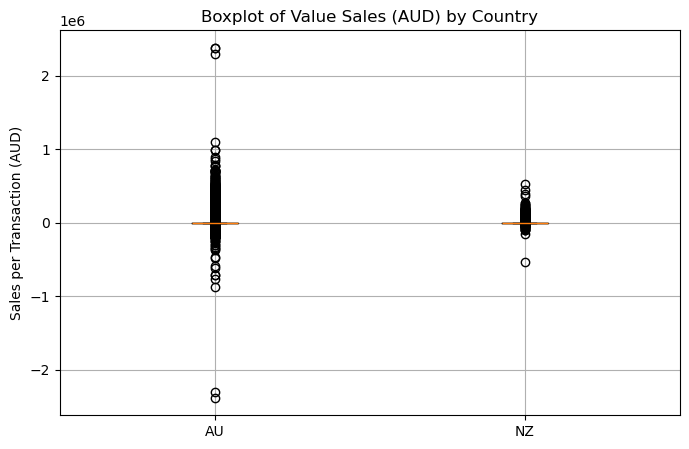

In [70]:
# Filter AU and NZ sales
au_sales = combined[combined['country'] == 'AU']['value_sales_aud']
nz_sales = combined[combined['country'] == 'NZ']['value_sales_aud']

# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
plt.boxplot([au_sales, nz_sales], labels=['AU', 'NZ'])
plt.title('Boxplot of Value Sales (AUD) by Country')
plt.ylabel('Sales per Transaction (AUD)')
plt.grid(True)
plt.show()

In [71]:
# Check for skewness

print("AU skewness:", au_sales.skew())
print("NZ skewness:", nz_sales.skew())

AU skewness: 30.262047435546002
NZ skewness: 22.789382000129624


In [72]:
# Create a new column with log-transformed value_sales in AUD -- to avoid overiding the value_sales_aud that will be used for Section 2 for Descriptive Analysis

combined['value_sales_log_aud'] = np.log1p(combined['value_sales_aud'])

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
# Filter transformed values by country
au_log = combined[combined['country'] == 'AU']['value_sales_log_aud']
nz_log = combined[combined['country'] == 'NZ']['value_sales_log_aud']

# Check skewness
print("AU log skew:", au_log.skew())
print("NZ log skew:", nz_log.skew())

AU log skew: 0.14332199259017223
NZ log skew: -0.28555307696489024


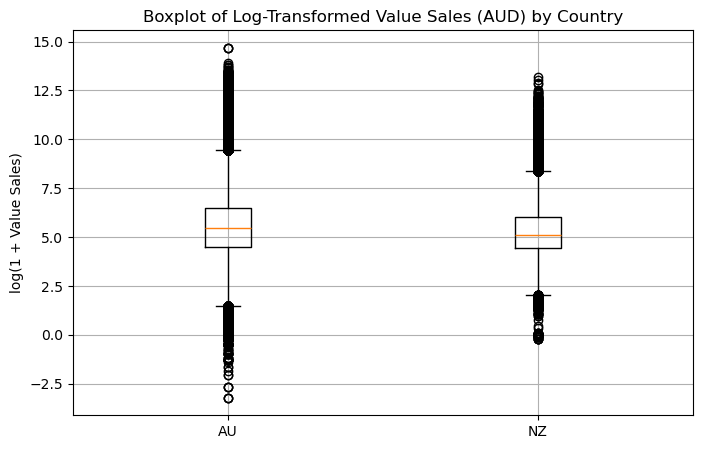

In [74]:
# Drop NaNs from each group before plotting
au_log = combined[(combined['country'] == 'AU') & (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']
nz_log = combined[(combined['country'] == 'NZ') & (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']

# Plot boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([au_log, nz_log])
plt.title('Boxplot of Log-Transformed Value Sales (AUD) by Country')
plt.ylabel('log(1 + Value Sales)')
plt.xticks([1, 2], ['AU', 'NZ'])  
plt.grid(True)
plt.show()

# Although the boxplot identified a large number of outliers, these were retained because the data underwent log transformation, 
# which addressed the extreme skewness and stabilized the variance. The outliers in sales data are valid high-value transactions rather than data errors. 
# Removing them would distort the true distribution of sales and discard meaningful business patterns. 
# Therefore, no manual outlier removal was performed post-transformation, as the log scale already mitigates their influence on the mean.

In [75]:
# Section 1b: EDA Identifying Outliers and Skewness and Data prep for Sections 2-4
# EDA for Two Sample T-Test No. 2: Compare sales between Major Cities (Sydney + Melb) vs Remaining cities

# Define district codes
major_codes = [200, 300]  # Sydney and Melbourne
other_codes = [410, 500, 310, 400, 210, 720, 710, 600, 510]  # All others based on your sheet

# Filter log-transformed value_sales for each group
major_cities = combined[(combined['customer_district_code'].isin(major_codes)) & (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']

other_cities = combined[(combined['customer_district_code'].isin(other_codes)) & (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']

print(major_cities.head())
print(other_cities.head())

13    9.390743
14    4.800737
16    4.752210
17    8.207195
18    5.845051
Name: value_sales_log_aud, dtype: float64
12     4.067658
65     6.536750
112    6.132009
113    6.249550
114    5.441031
Name: value_sales_log_aud, dtype: float64


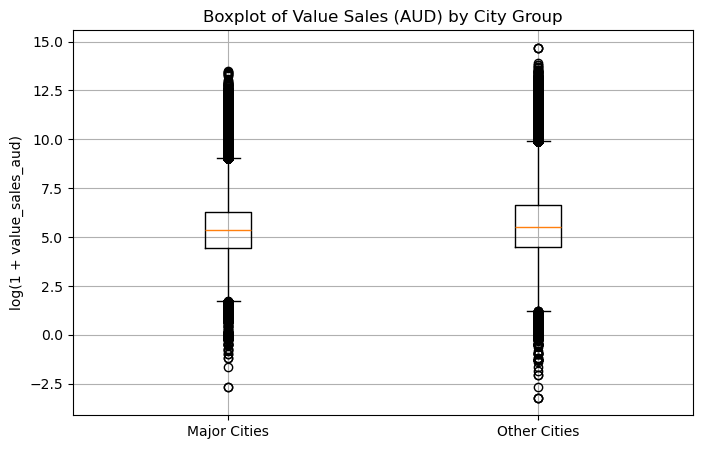

In [76]:
# Create boxplot to compare distributions

plt.figure(figsize=(8, 5))
plt.boxplot([major_cities, other_cities])
plt.xticks([1, 2], ['Major Cities', 'Other Cities'])
plt.title('Boxplot of Value Sales (AUD) by City Group')
plt.ylabel('log(1 + value_sales_aud)')
plt.grid(True)
plt.show()

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/3547366796.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([trade_cost, professional_cost], labels=['Trade', 'Professional'])


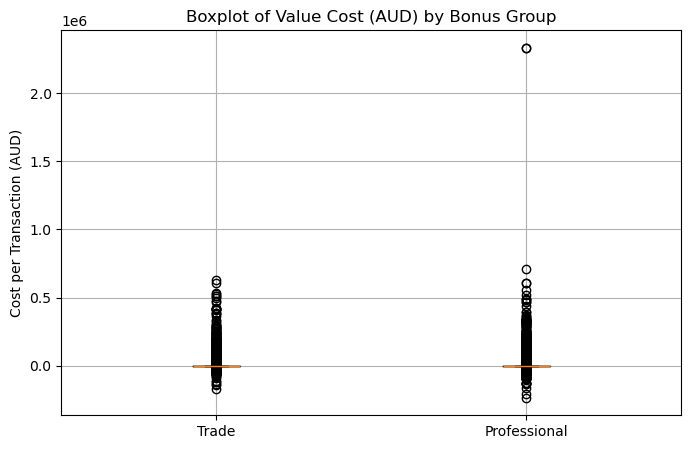

In [77]:
# Section 1b: EDA Identifying Outliers and Skewness and Data prep for Sections 2-4
# EDA for Two Sample T-Test No. 3: Do average transaction costs differ significantly between Trade and Professional bonus group sales?

# Filter cost values before transformation
trade_cost = combined[
    (combined['bonus_group_code'] == 'Trade') & 
    (combined['value_cost_aud'].notna())
]['value_cost_aud']

professional_cost = combined[
    (combined['bonus_group_code'] == 'Professional') & 
    (combined['value_cost_aud'].notna())
]['value_cost_aud']

# Boxplot to visualize outliers before transformation
plt.figure(figsize=(8, 5))
plt.boxplot([trade_cost, professional_cost], labels=['Trade', 'Professional'])
plt.title('Boxplot of Value Cost (AUD) by Bonus Group')
plt.ylabel('Cost per Transaction (AUD)')
plt.grid(True)
plt.show()

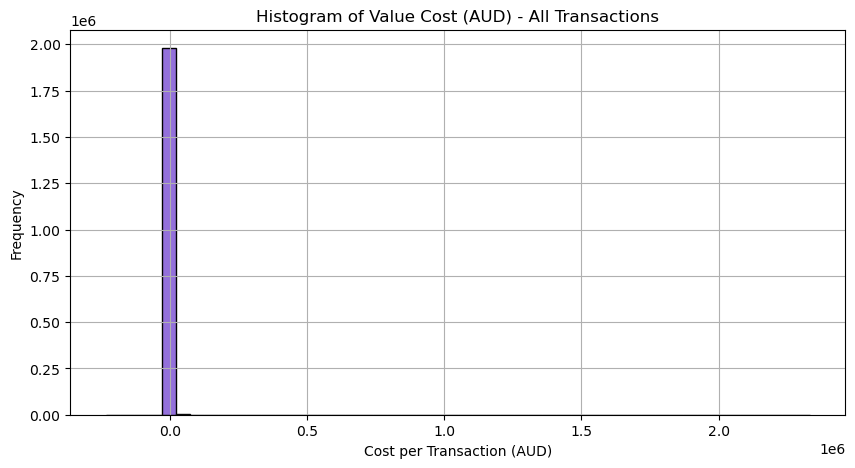

In [78]:
#Plot histogram to check distribution

plt.figure(figsize=(10, 5))
plt.hist(combined['value_cost_aud'].dropna(), bins=50, color='mediumpurple', edgecolor='black')
plt.title('Histogram of Value Cost (AUD) - All Transactions')
plt.xlabel('Cost per Transaction (AUD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [79]:
# Check for skewness

print("Trade skewness:", trade_cost.skew())
print("Professional skewness:", professional_cost.skew())

Trade skewness: 76.55841428593466
Professional skewness: 87.99894242462409


In [80]:
# Create a new column with log-transformed value_cost in AUD -- to avoid overriding the value_cost_aud that is used for Section 3

combined['value_cost_log_aud'] = np.log1p(combined['value_cost_aud'])

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [81]:
# Filter transformed cost values for each group
trade_cost_log = combined[
    (combined['bonus_group_code'] == 'Trade') & 
    (combined['value_cost_log_aud'].notna())
]['value_cost_log_aud']

professional_cost_log = combined[
    (combined['bonus_group_code'] == 'Professional') & 
    (combined['value_cost_log_aud'].notna())
]['value_cost_log_aud']

# Print skewness for both groups
print("Trade log skewness:", trade_cost_log.skew())
print("Professional log skewness:", professional_cost_log.skew())

Trade log skewness: 0.29959618383119296
Professional log skewness: 0.5234346097856251


/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/3065852663.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([trade_cost_log, professional_cost_log], labels=['Trade', 'Professional'])


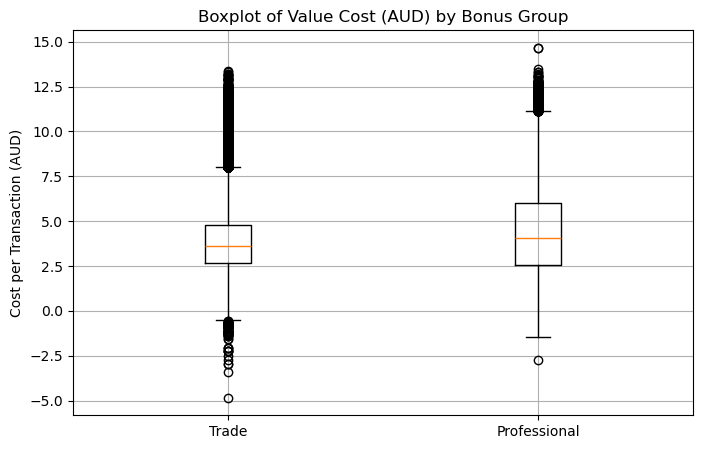

In [82]:
# Boxplot to visualize outliers after transformation

plt.figure(figsize=(8, 5))
plt.boxplot([trade_cost_log, professional_cost_log], labels=['Trade', 'Professional'])
plt.title('Boxplot of Value Cost (AUD) by Bonus Group')
plt.ylabel('Cost per Transaction (AUD)')
plt.grid(True)
plt.show()

# Rather than removing high-cost outliers which are part of real sales dynamics the group applied a log transformation to reduce skewness and meet test assumptions. This preserves all transactions while normalizing variance.

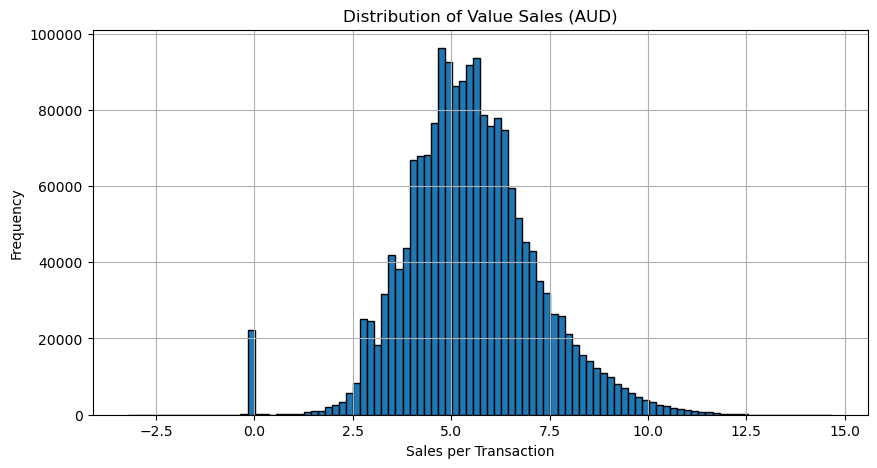

In [83]:
#Check distribution of value_sales_log_aud 

plt.figure(figsize=(10, 5))
plt.hist(combined['value_sales_log_aud'].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of Value Sales (AUD)')
plt.xlabel('Sales per Transaction')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [84]:
# Check if regression will work well or if transformation is needed
# Check strength of linear relationship between value_sales_log_aud, value_cost_log_aud, and value_quantity – helps assess multicollinearity or predictor relevance

combined[['value_sales_log_aud', 'value_cost_log_aud', 'value_quantity']].corr()

,value_sales_log_aud,value_cost_log_aud,value_quantity
value_sales_log_aud,1.000000,0.588899,0.099174
value_cost_log_aud,0.588899,1.000000,0.136888
value_quantity,0.099174,0.136888,1.000000


In [85]:
# Check skewness of value_quantity

print("Skewness of value_quantity:", combined['value_quantity'].skew())

Skewness of value_quantity: 114.67167157688795


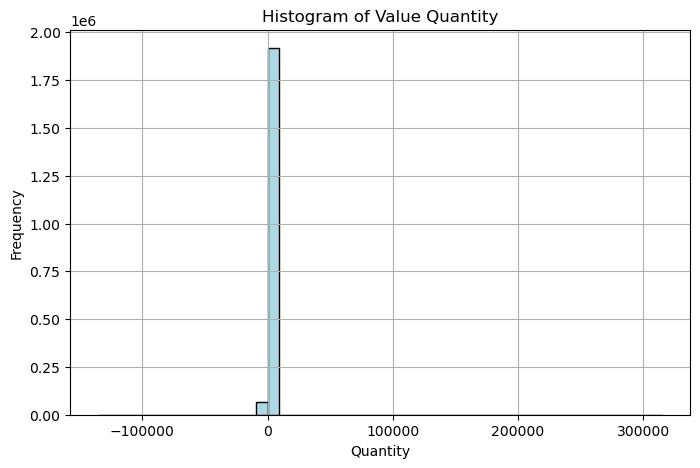

In [86]:
# Histogram of value_quantity

plt.figure(figsize=(8, 5))
plt.hist(combined['value_quantity'].dropna(), bins=50, color='lightblue', edgecolor='black')
plt.title('Histogram of Value Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

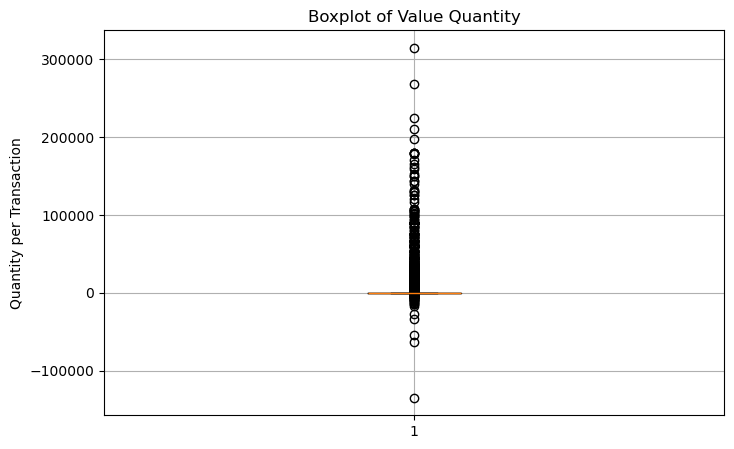

In [87]:
# Create Boxplots to visualize outliers for value_quantity

plt.figure(figsize=(8, 5))
plt.boxplot(combined['value_quantity'].dropna())
plt.title('Boxplot of Value Quantity')
plt.ylabel('Quantity per Transaction')
plt.grid(True)
plt.show()

In [88]:
# Create a new column with log-transformed value_quantity

combined['value_quantity_log'] = np.log1p(combined['value_quantity'])

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [89]:
# Check strength of linear relationship between value_sales_log_aud, value_cost_log_aud, and value_quantity to assess multicollinearity or predictor relevance

combined[['value_sales_log_aud', 'value_cost_log_aud', 'value_quantity_log']].corr()

,value_sales_log_aud,value_cost_log_aud,value_quantity_log
value_sales_log_aud,1.000000,0.588899,0.351684
value_cost_log_aud,0.588899,1.000000,0.615867
value_quantity_log,0.351684,0.615867,1.000000


In [90]:
#Check dataframe info 

combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1985671 entries, 12 to 1988381
Data columns (total 39 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              float64       
 2   customer_district_code    float64       
 3   business_area_code        object        
 4   item_group_code           object        
 5   item_class_code           object        
 6   item_type                 float64       
 7   bonus_group_code          object        
 8   environment_group_code    object        
 9   technology_group_code     object        
 10  commission_group_code     object        
 11  reporting_classification  object        
 12  light_source              object        
 13  warehouse_code            object        
 14  abc_class_code            object        
 15  abc_class_volume          object        
 16  business_chain_l1_code    object        
 17  business_cha

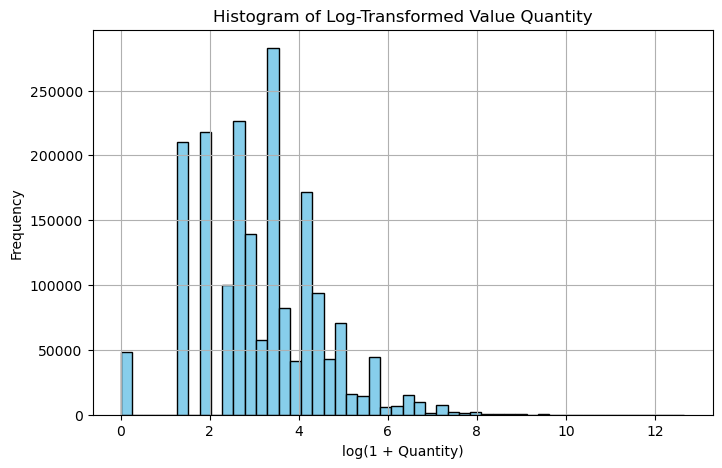

In [91]:
# Histogram of log-transformed value_quantity

plt.figure(figsize=(8, 5))
plt.hist(combined['value_quantity_log'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-Transformed Value Quantity')
plt.xlabel('log(1 + Quantity)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [92]:
# List of categorical features for Section 4 Question 1
categorical_vars = ['item_type', 'bonus_group_code', 'business_area_code', 'contact_method_code', 'year', 'month']

# Check unique values per categorical column
for col in categorical_vars:
    print(f"\n{col} - Unique values:\n", combined[col].value_counts(dropna=False))


item_type - Unique values:
 item_type
7.0    950772
5.0    473768
6.0    253950
1.0    190482
9.0     74147
4.0     22696
8.0      7753
2.0      7583
3.0      4520
Name: count, dtype: int64

bonus_group_code - Unique values:
 bonus_group_code
Trade           1650273
Professional     335398
Name: count, dtype: int64

business_area_code - Unique values:
 business_area_code
LMP    807772
SUR    404843
COM    200981
OTH    186904
DLT    103329
FLD     91304
TRO     33716
TAL     33101
SAE     28987
URB     26863
RWY     19272
HLB     18147
PEN      8829
LCP      6729
980      5490
EXL      2232
970      1450
999      1260
940      1176
920      1004
985       673
910       504
950       418
IAI       226
945       180
960       157
IAE        99
930        25
Name: count, dtype: int64

contact_method_code - Unique values:
 contact_method_code
NA     1899254
FAX      41894
EDI       4451
TBA       1789
Z38       1748
        ...   
WY0          1
D4B          1
LE1          1
PCN          

In [93]:
# Show unique values for all columns
for col in combined.columns:
    unique_vals = combined[col].unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Sample values: {unique_vals[:10]}")


Column: accounting_date
Number of unique values: 1627
Sample values: <DatetimeArray>
['2020-01-17 00:00:00', '2022-04-20 00:00:00', '2022-04-04 00:00:00',
 '2020-01-25 00:00:00', '2024-04-27 00:00:00', '2020-02-17 00:00:00',
 '2022-02-09 00:00:00', '2024-03-19 00:00:00', '2021-06-06 00:00:00',
 '2020-01-19 00:00:00']
Length: 10, dtype: datetime64[ns]

Column: company_code
Number of unique values: 10
Sample values: [101. 100. 140. 205. 170. 220. 950. 240. 510. 120.]

Column: customer_district_code
Number of unique values: 17
Sample values: [400. 200. 300. 410. 210. 720. 500. 600. 310. 710.]

Column: business_area_code
Number of unique values: 28
Sample values: ['LMP' 'FLD' 'OTH' 'SUR' 'DLT' 'TRO' 'COM' 'URB' 'HLB' 'SAE']

Column: item_group_code
Number of unique values: 614
Sample values: ['LMP01008' 'FLD03002' '999' 'SUR08001' 'DLT01002' 'TRO03001' 'COM90001'
 'COM99001' 'SUR80001' 'URB04002']

Column: item_class_code
Number of unique values: 204
Sample values: ['LMP01' 'FLD03' '14001

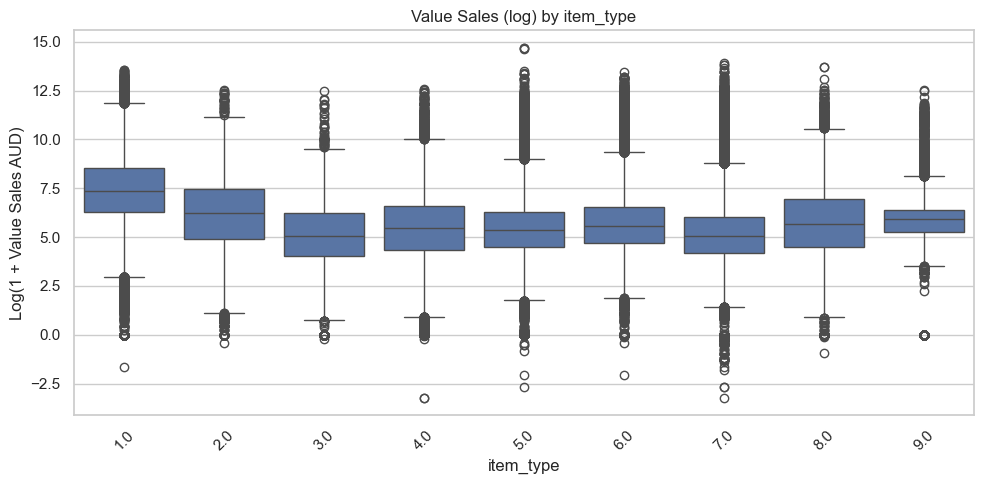

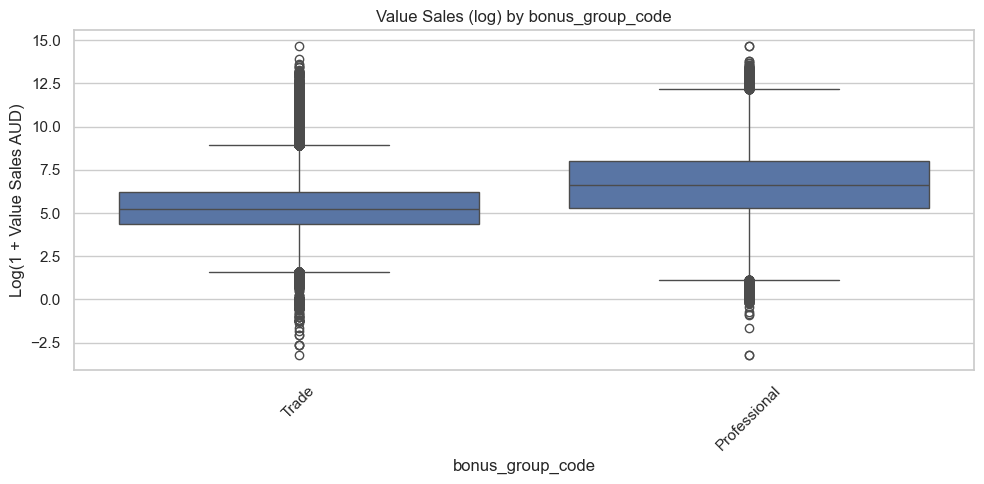

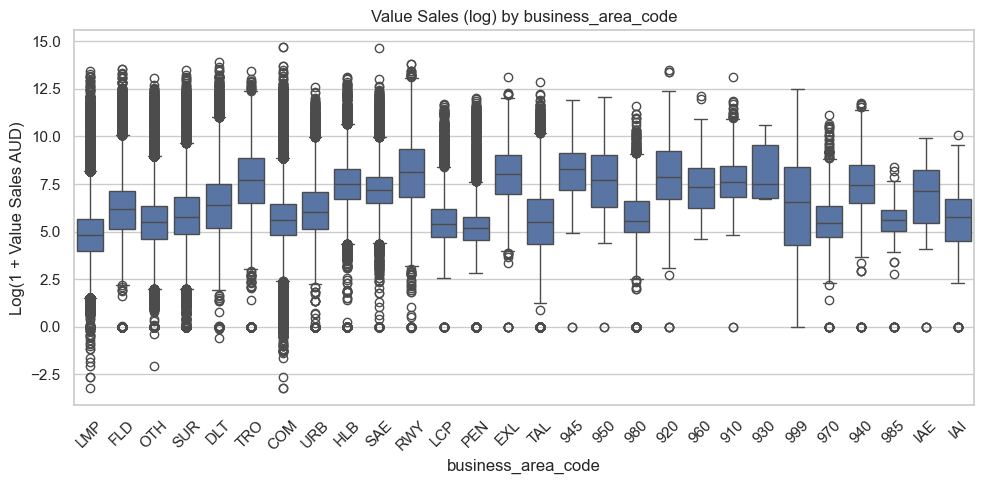

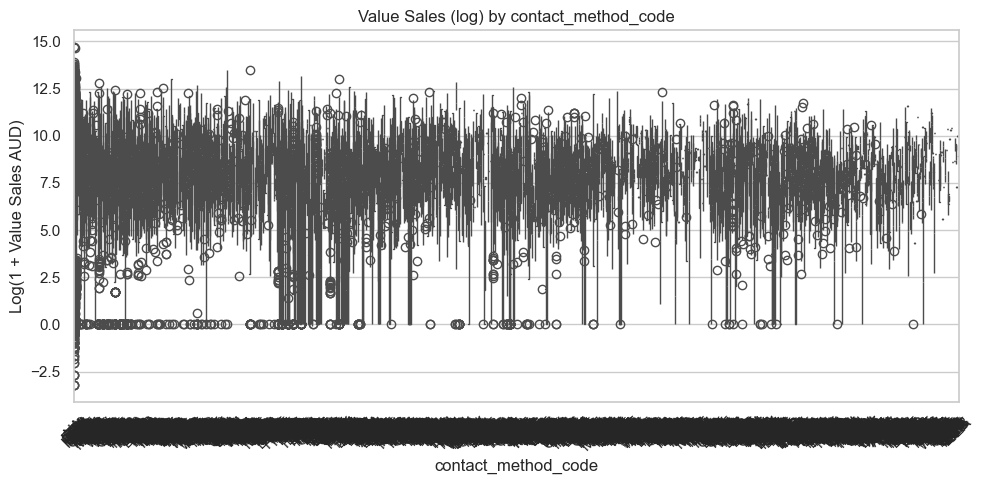

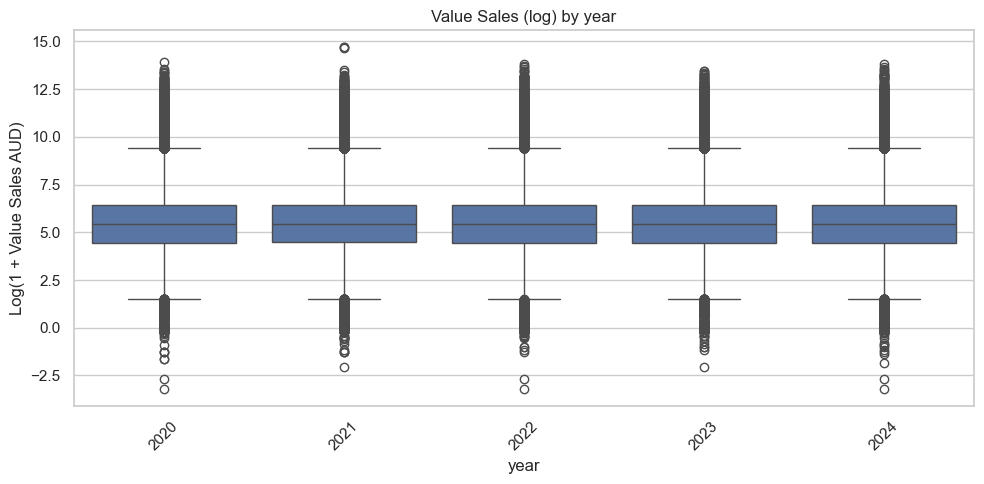

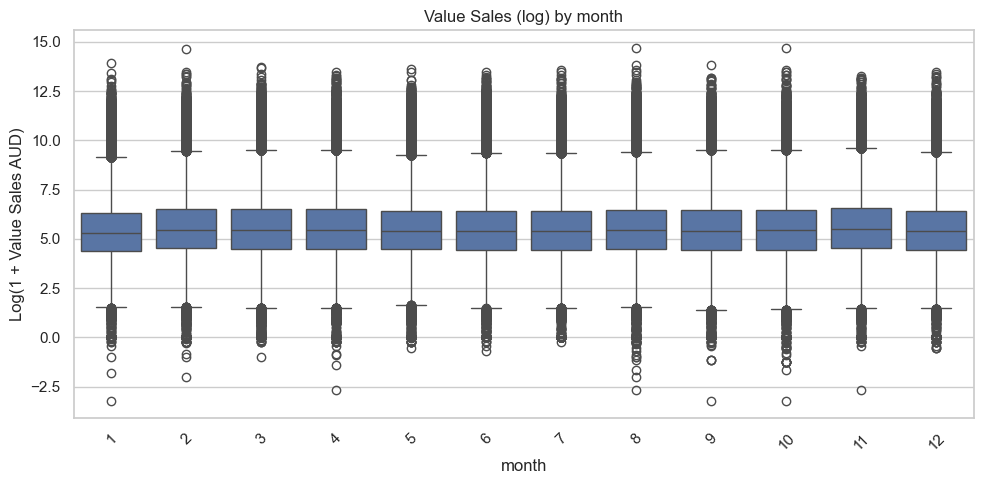

In [94]:
#Create boxplots to identify categorical drivers of sales that can be included in regression model (Section 4)

# Set style
sns.set(style="whitegrid")

# Define the columns  to visualize
categorical_vars = ['item_type', 'bonus_group_code', 'business_area_code', 'contact_method_code', 'year', 'month']

# Loop through each categorical variable and plot
for col in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=combined[col], y=combined['value_sales_log_aud'])
    plt.title(f'Value Sales (log) by {col}')
    plt.xlabel(col)
    plt.ylabel('Log(1 + Value Sales AUD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [95]:
# EDA for Multiple Regression No. 2: What explains cost variation (value_cost)?
# Check strength of linear relationship between log(cost) and log(quantity) to assess multicollinearity and predictor relevance

combined[['value_cost_log_aud', 'value_quantity_log']].corr()

,value_cost_log_aud,value_quantity_log
value_cost_log_aud,1.000000,0.615867
value_quantity_log,0.615867,1.000000


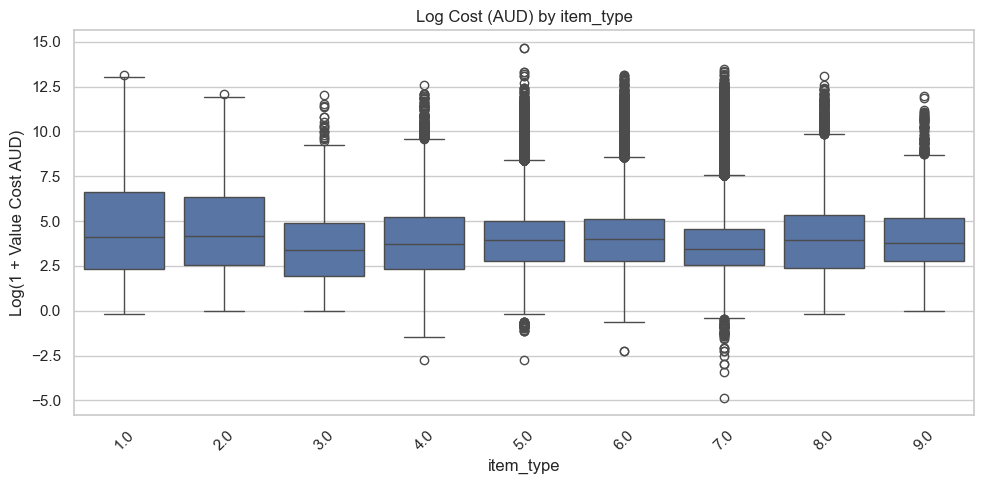

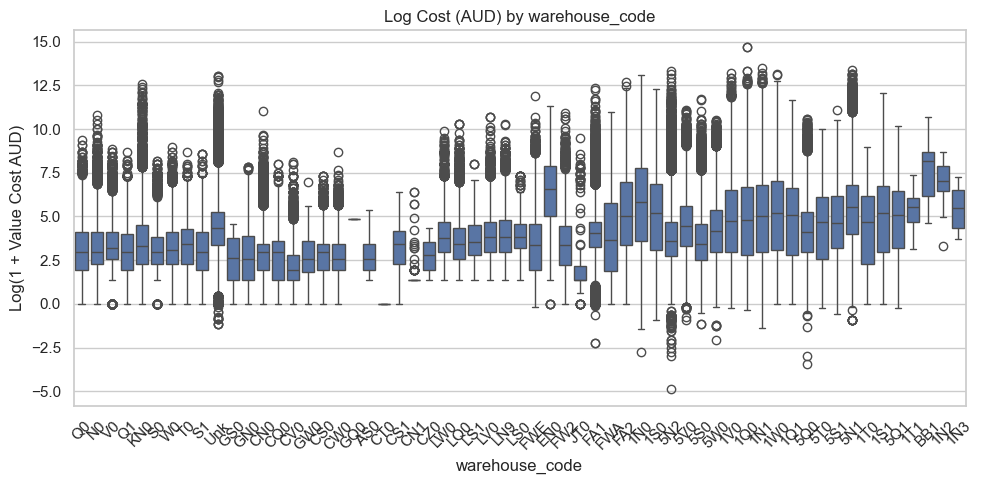

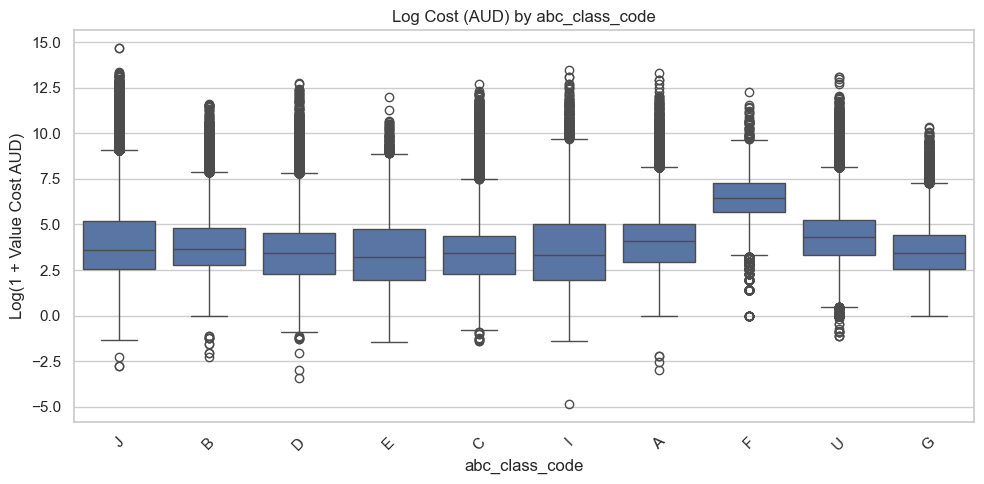

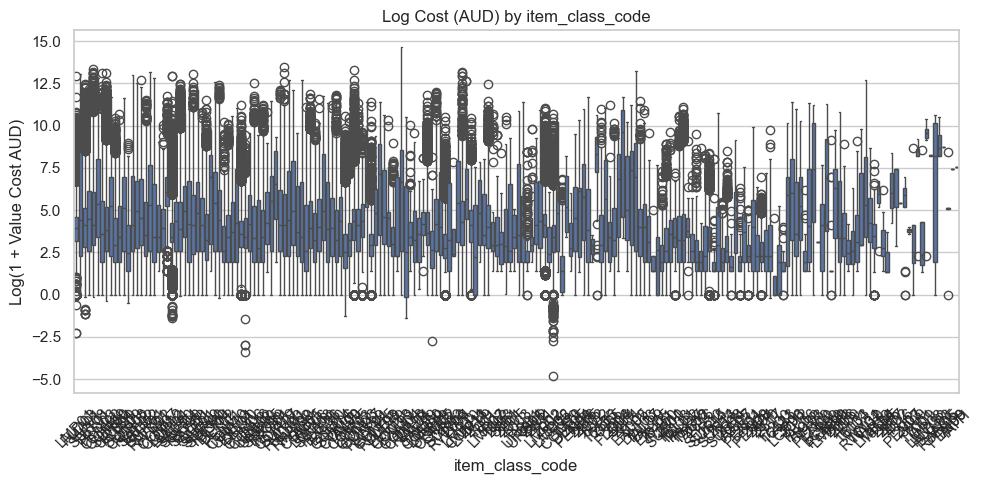

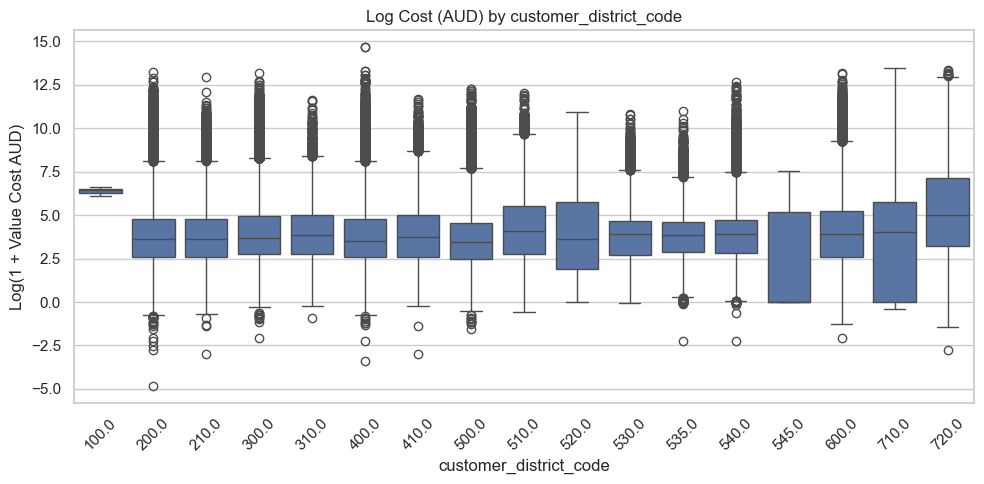

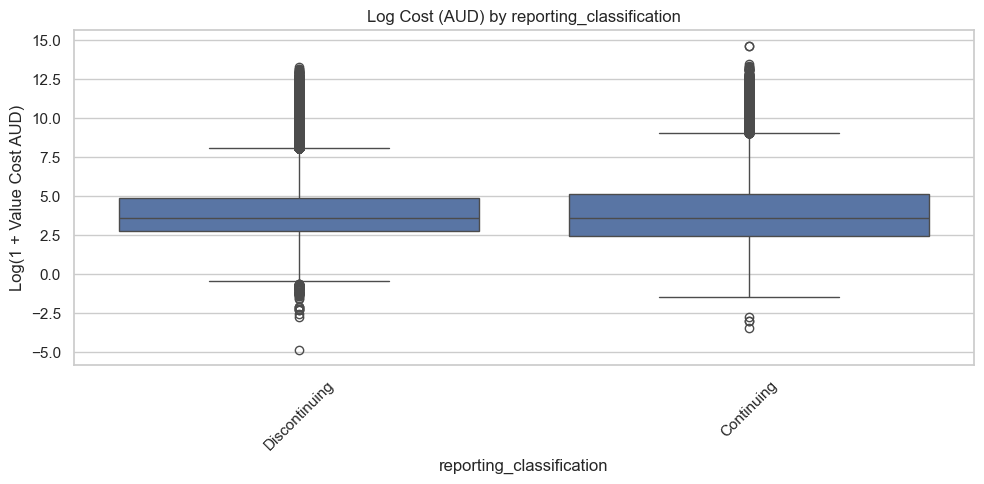

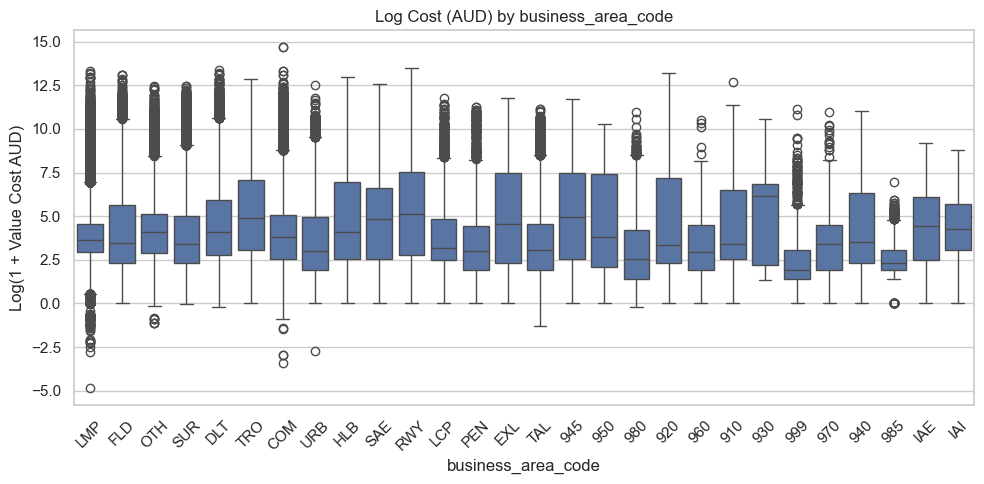

In [96]:
# Visualize distribution of log(cost) across relevant categorical variables
# This is to identify which categories might explain variation in cost

# Shortlisted categorical features based on metadata and manageable unique counts
categorical_vars = [
    'item_type',               
    'warehouse_code',          
    'abc_class_code',          
    'item_class_code',
    'customer_district_code',
    'reporting_classification',
    'business_area_code'
]

# Loop through and generate boxplots
for col in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=combined[col], y=combined['value_cost_log_aud'])
    plt.title(f'Log Cost (AUD) by {col}')
    plt.xlabel(col)
    plt.ylabel('Log(1 + Value Cost AUD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [97]:
# Filter to only Sydney and Melbourne transactions
# The analysis question specifically compares Sydney and Melbourne regions.

combined_filtered = combined[combined['customer_district_code'].isin([200, 300])]

In [98]:
# Check correlation between sales and quantity
# Identifies if quantity is a strong continuous predictor of sales in this regional subset.

combined_filtered[['value_sales_log_aud', 'value_quantity_log']].corr()

,value_sales_log_aud,value_quantity_log
value_sales_log_aud,1.000000,0.331656
value_quantity_log,0.331656,1.000000


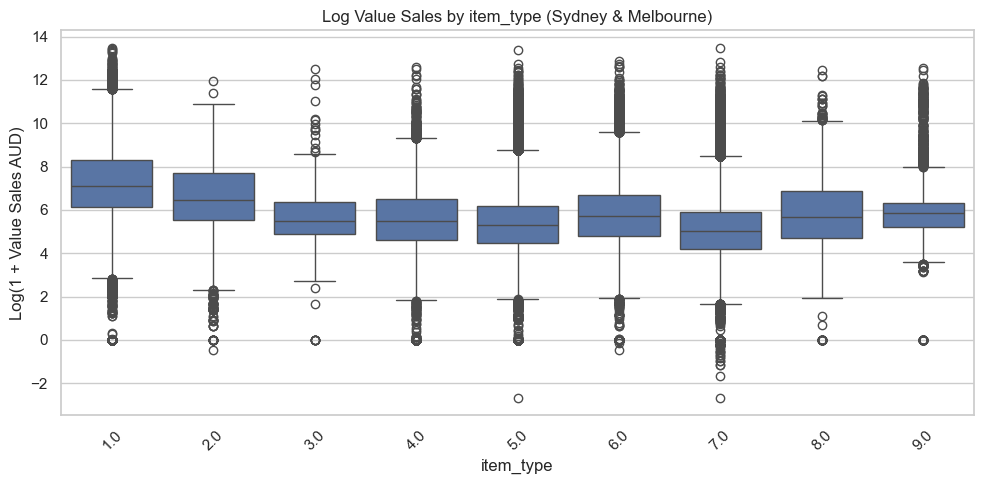

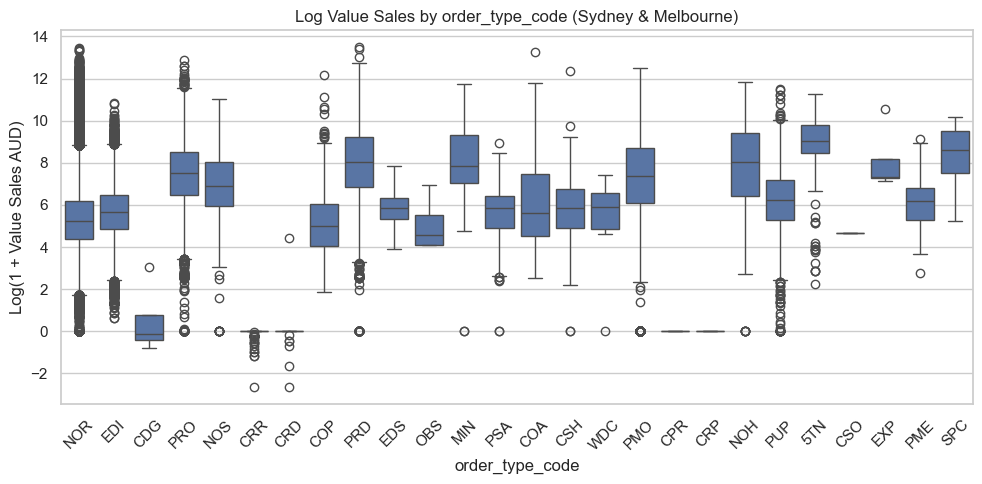

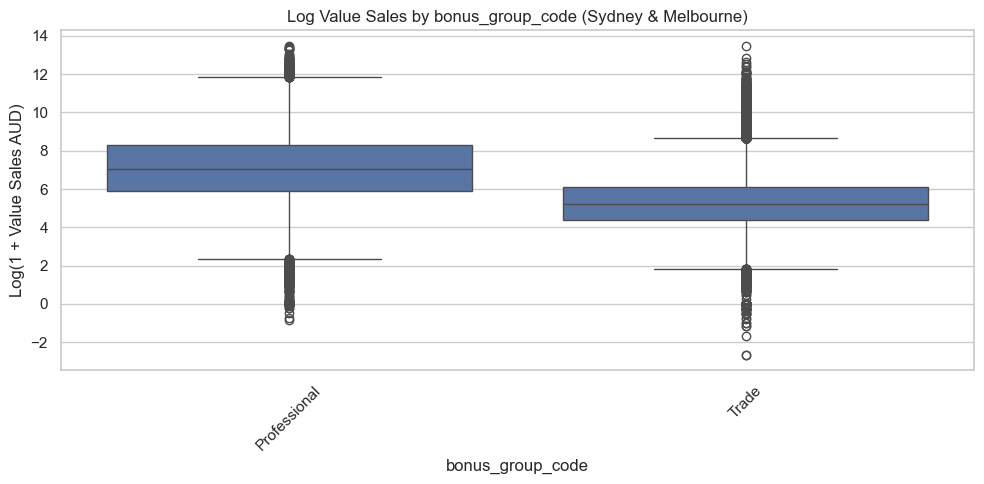

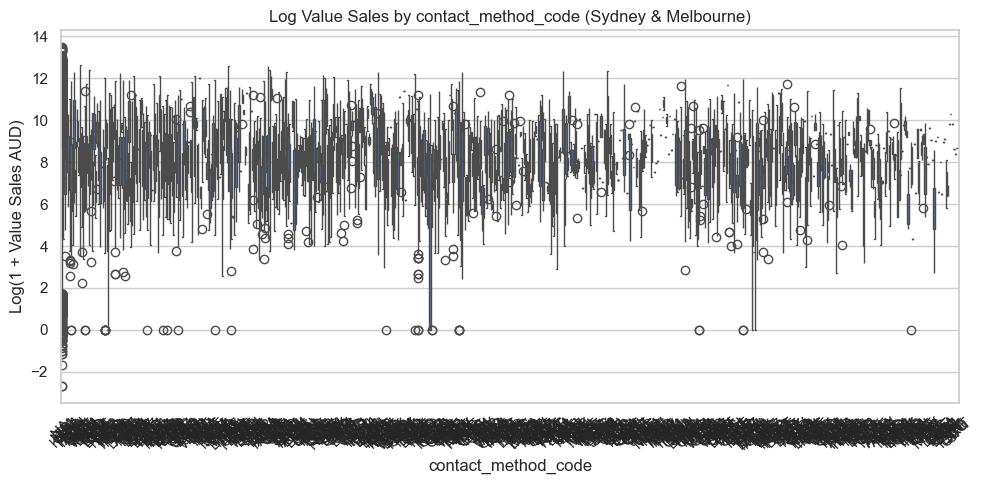

In [99]:
# Create Boxplots for categorical variables (Sydney + Melbourne only)
# Visualizes group-level differences in sales by category.
# Helps decide which categorical variables may explain sales variance in this regional subset.

cat_vars_q3 = ['item_type', 'order_type_code', 'bonus_group_code', 'contact_method_code']

for col in cat_vars_q3:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=combined_filtered[col], y=combined_filtered['value_sales_log_aud'])
    plt.title(f'Log Value Sales by {col} (Sydney & Melbourne)')
    plt.xlabel(col)
    plt.ylabel('Log(1 + Value Sales AUD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Answer Section 2: Exploratory Insights (all the codes in one cell - do not insert extra cells) 

## section 2.1  Sales by month per year

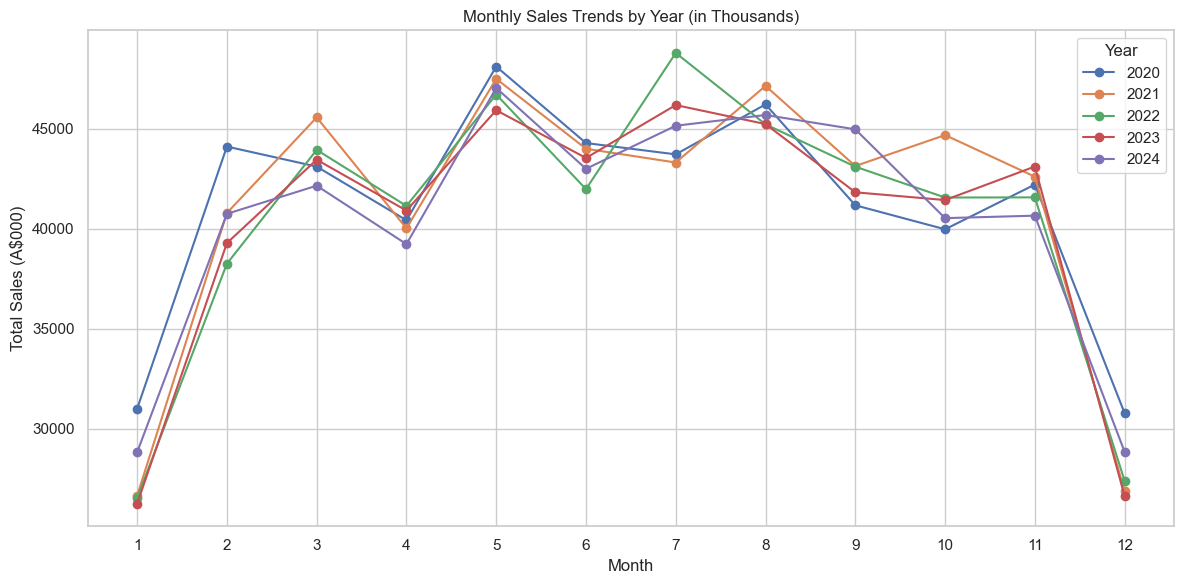

In [102]:
# Plot chart for Sales by month per year

# Group and aggregate sales
monthly_sales = combined.groupby(['year', 'month'])['value_sales_aud'].sum().reset_index()

# Convert to thousands and round
monthly_sales['value_sales_aud'] = (monthly_sales['value_sales_aud'] / 1000).round()

# Pivot to reshape the data
pivot = monthly_sales.pivot(index='month', columns='year', values='value_sales_aud')

# Plot
plt.figure(figsize=(12, 6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=str(year))

plt.title('Monthly Sales Trends by Year (in Thousands)')
plt.xlabel('Month')
plt.ylabel('Total Sales (A$000)')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## section 2.2 Top performing Cities by Total Sales

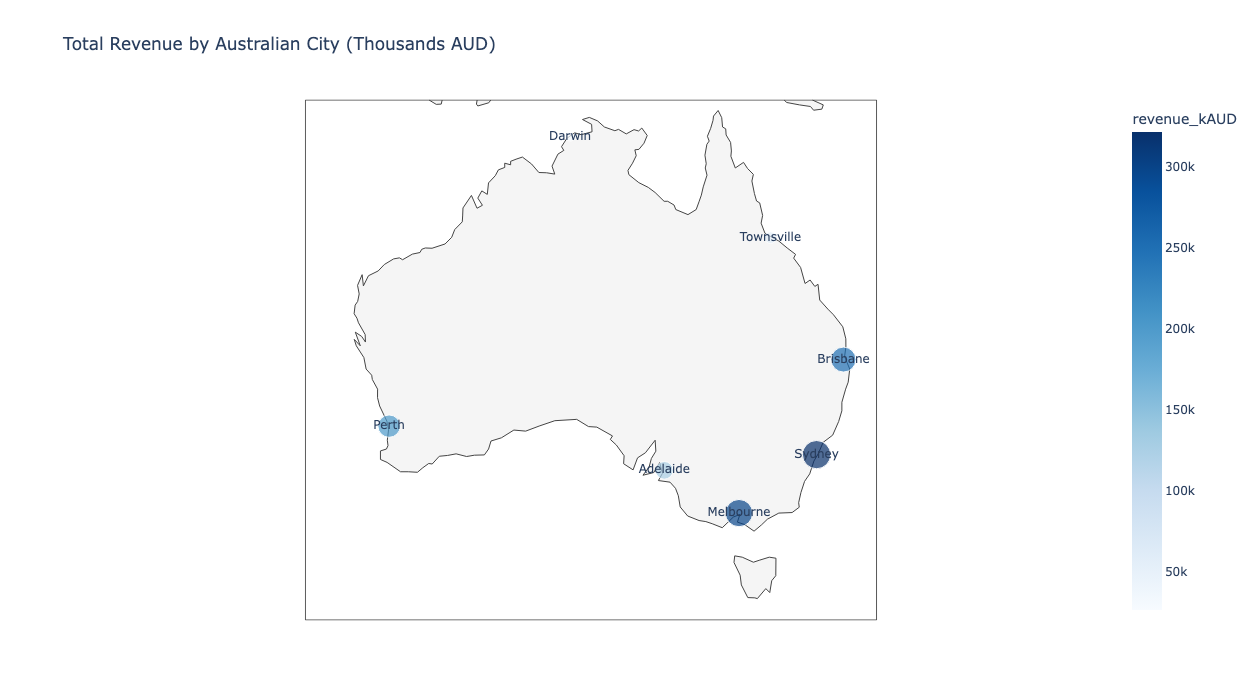

In [242]:
#Plot chart for Top performing Cities by Total Sales

import plotly.express as px
# Create mapping from code to full name
district_mapping = {
    410: 'Townsville',
    300: 'Melbourne',
    500: 'Adelaide',
    310: 'Tasmania',
    400: 'Brisbane',
    200: 'Sydney',
    210: 'Act/riverina',
    720: 'Intercompany Sales',
    710: 'Head Office Sales',
    600: 'Perth',
    510: 'Darwin',
    530: 'South Island - Nz',
    535: 'Central Region - Nz',
    540: 'Northern Region - Nz',
    520: 'Inline - Nz',
    545: 'Head Office Nz'
}
# Create full names
combined['district_name'] = combined['customer_district_code'].map(district_mapping)

#Prepare lat/lon for major cities ( match only city based district names)
city_latlon = {
    'Sydney': (-33.8688, 151.2093),
    'Melbourne': (-37.8136, 144.9631),
    'Brisbane': (-27.4698, 153.0251),
    'Perth': (-31.9505, 115.8605),
    'Adelaide': (-34.9285, 138.6007),
    'Townsville': (-19.2589, 146.8169),
    'Darwin': (-12.4634, 130.8456)
}

# Filter sales
revenue_by_city = (
    combined[combined['district_name'].isin(city_latlon.keys())]
    .groupby('district_name')['value_sales_aud']
    .sum()
    .reset_index()
)

# Add coordinates
revenue_by_city['lat'] = revenue_by_city['district_name'].map(lambda city: city_latlon[city][0])
revenue_by_city['lon'] = revenue_by_city['district_name'].map(lambda city: city_latlon[city][1])
revenue_by_city['revenue_kAUD'] = revenue_by_city['value_sales_aud'] / 1000  # Convert to thousands

#Plot with Plotly
fig = px.scatter_geo(
    revenue_by_city,
    lat='lat',
    lon='lon',
    text='district_name',
    size='revenue_kAUD',
    color='revenue_kAUD',
    projection='natural earth',
    color_continuous_scale='Blues',
    title='Total Revenue by Australian City (Thousands AUD)',
    template='plotly_white',
    hover_name='district_name',
    hover_data={'lat': False, 'lon': False, 'revenue_kAUD': True}
)
fig.update_geos(
    lataxis_range=[-45, -10],
    lonaxis_range=[110, 155],
    showland=True,
    landcolor="whitesmoke"
)
# See only Australia
fig.update_layout(geo_scope='world',width=1000, height=700 )

## section 2.3 Sales by Light Source

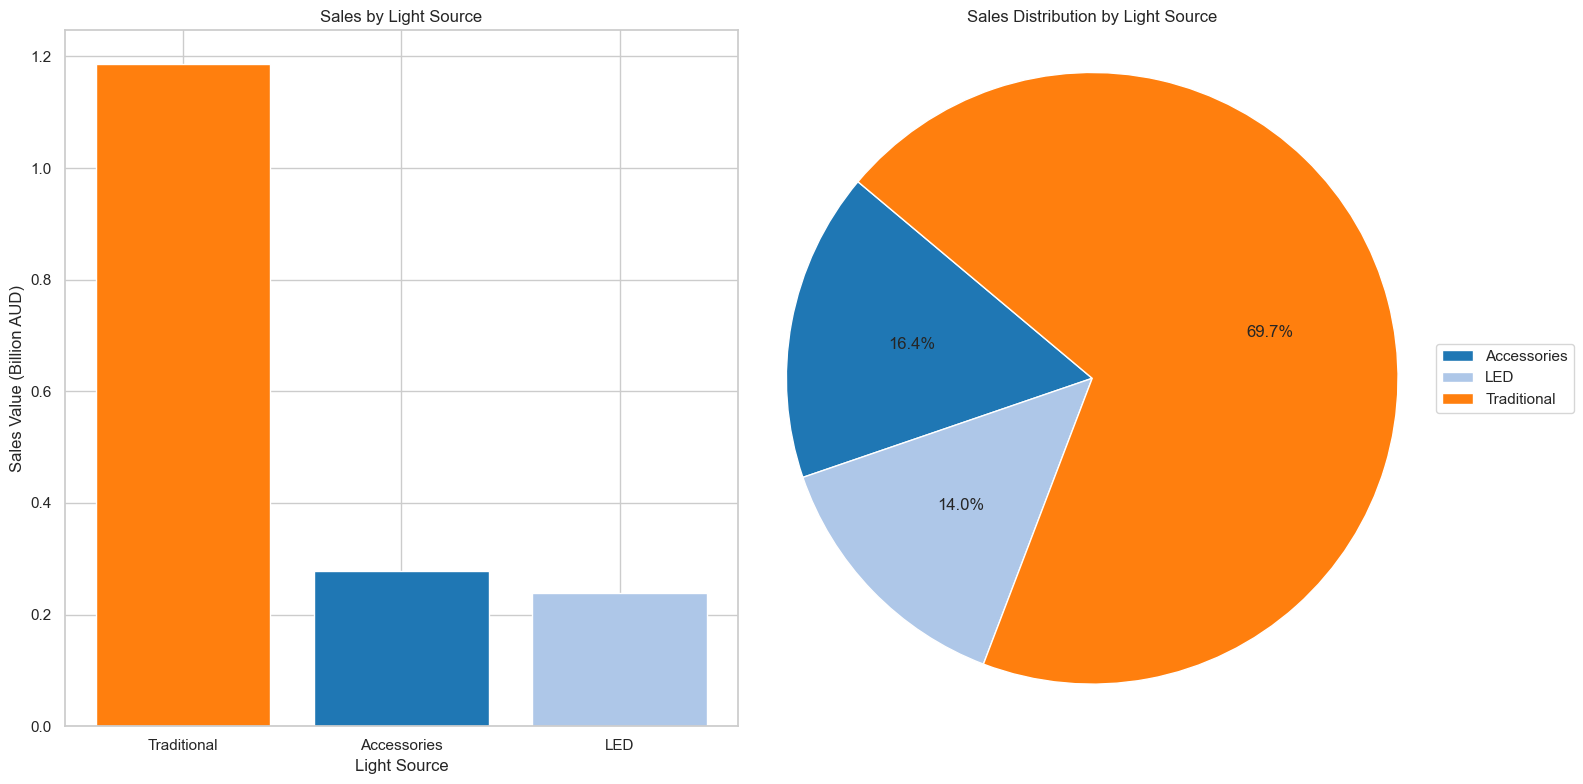

In [243]:
# Plot chart for Sales by Light Source 

# Display the names of all columns in the dataset
combined.columns

# Group and sort data
sales_by_source = combined.groupby('light_source')['value_sales_aud'].sum().sort_values(ascending=False).reset_index()

#set the colors to match with the pie chart
colors = {
    'Traditional': '#ff7f0e',  
    'Accessories': '#1f77b4',  
    'LED': '#aec7e8'           
}

plt.figure(figsize=(16, 8))

# Plot bar chart
plt.subplot(1, 2, 1)
plt.bar(
    sales_by_source['light_source'],
    sales_by_source['value_sales_aud']/1000000000,
    color=[colors[x] for x in sales_by_source['light_source']],
)
plt.title('Sales by Light Source')
plt.xlabel('Light Source')
plt.ylabel('Sales Value (Billion AUD)')

# Group and sum sales
sales_by_source = combined.groupby('light_source')['value_sales_aud'].sum().reset_index()

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(
    sales_by_source['value_sales_aud'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors 
)

plt.title('Sales Distribution by Light Source')
plt.axis('equal')  
plt.legend(sales_by_source['light_source'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## section 2.4 Transaction Volume per Warehouse

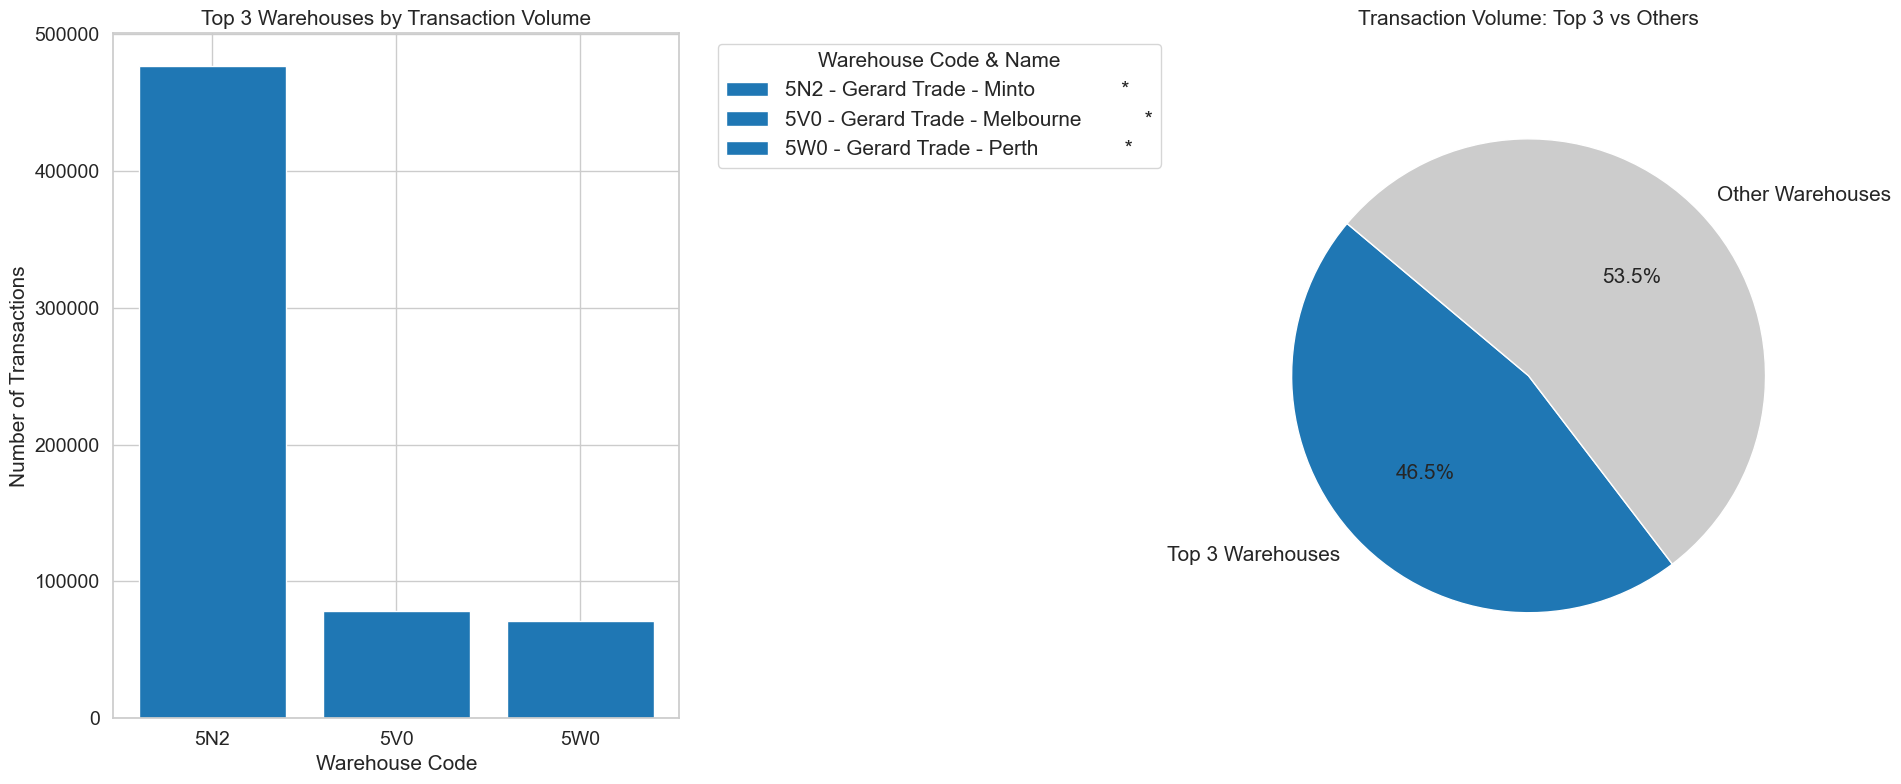

In [244]:
# Plot chart for Transaction Volume per Warehouse

# Load metadata file
metadata = pd.read_excel('Metadata.xlsx', sheet_name='warehouse_code')

# Drop CN0 and Unk from combined data before counting
cleaned_combine = combined[~combined['warehouse_code'].isin(['CN0', 'Unk'])]

# Count transactions per warehouse
warehouse_volume = cleaned_combine['warehouse_code'].value_counts().reset_index()
warehouse_volume.columns = ['warehouse_code', 'transaction_count']

# Top 3 after dropping CN0 and Unk
top_3 = warehouse_volume.head(3).copy()
top_3_total = top_3['transaction_count'].sum()
total_transactions = warehouse_volume['transaction_count'].sum()
others_total = total_transactions - top_3_total

# Merge with warehouse names
top_3_named = top_3.merge(metadata[['warehouse_code', 'warehouse_code&name']], on='warehouse_code', how='left')


plt.figure(figsize=(19, 8))

# Plot bar chart 
plt.subplot(1, 2, 1)
plt.bar(top_3_named['warehouse_code'][0], top_3_named['transaction_count'][0],
        color='#1f77b4',
        label=top_3_named['warehouse_code&name'][0])
plt.bar(top_3_named['warehouse_code'][1], top_3_named['transaction_count'][1],
        color='#1f77b4',
        label=top_3_named['warehouse_code&name'][1])
plt.bar(top_3_named['warehouse_code'][2], top_3_named['transaction_count'][2],
        color='#1f77b4',
        label=top_3_named['warehouse_code&name'][2])

plt.title('Top 3 Warehouses by Transaction Volume', fontsize=15)
plt.xlabel('Warehouse Code', fontsize=15)
plt.ylabel('Number of Transactions', fontsize=15)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(
    title="Warehouse Code & Name",
    fontsize=15,
    title_fontsize=15,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Plot pie chart
plt.subplot(1, 2, 2)
pie_labels = ['Top 3 Warehouses', 'Other Warehouses']
pie_values = [top_3_total, others_total]
colors = ['#1f77b4', '#cccccc']

plt.pie(
    pie_values,
    labels=pie_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 15}
)
plt.title('Transaction Volume: Top 3 vs Others', fontsize=15)

plt.axis('equal')
plt.tight_layout()
plt.show()


## section 2.5 ABC Class Volume Profile

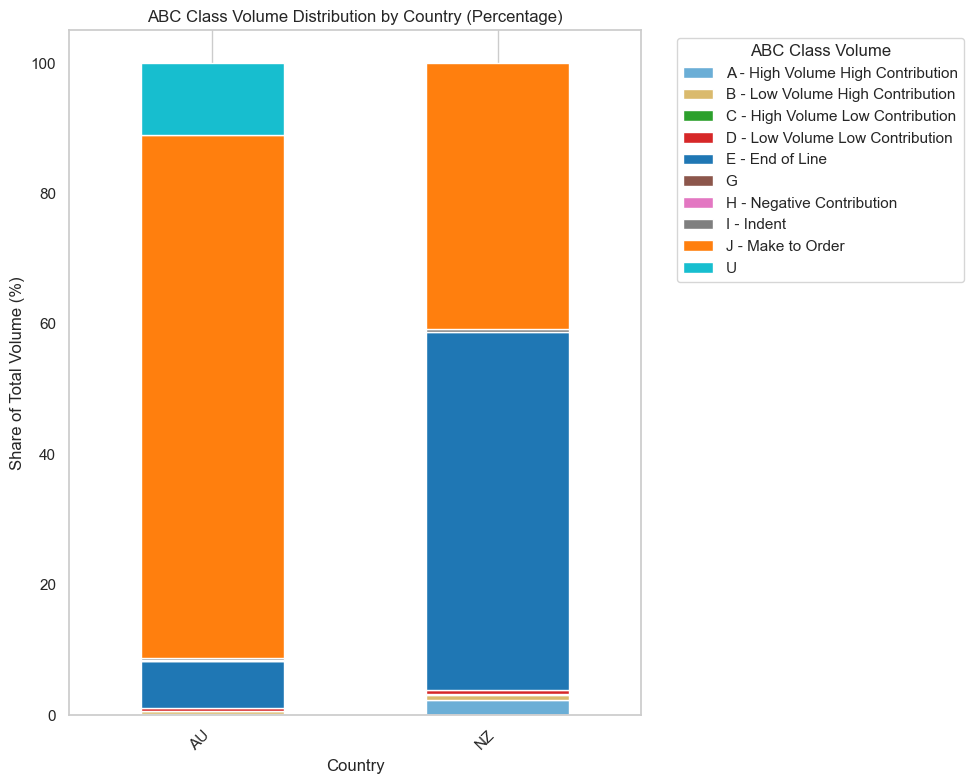

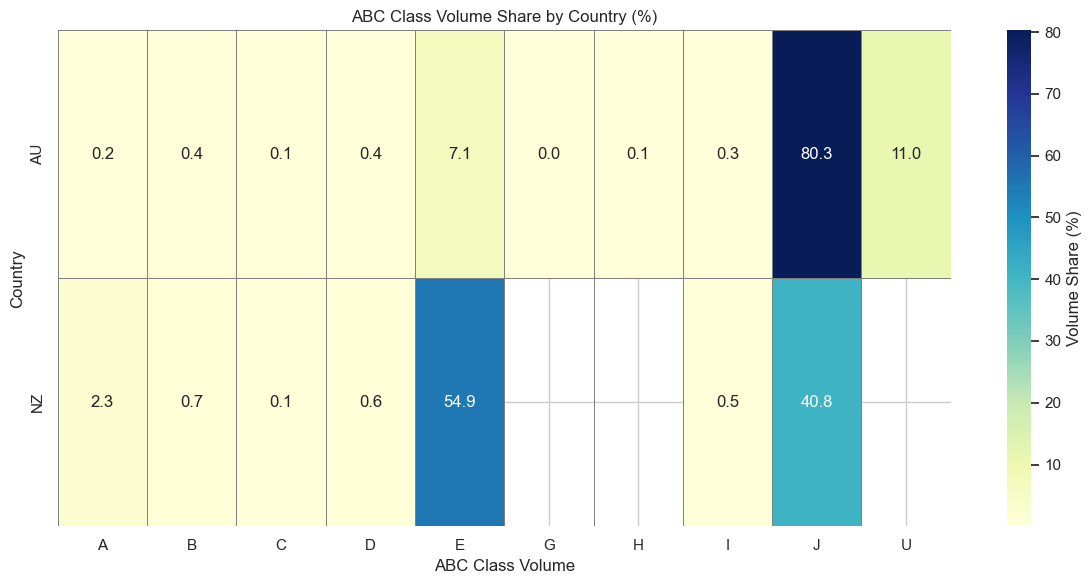

In [245]:
# Load metadata file
abc_name = pd.read_excel('Metadata.xlsx', sheet_name='abc_class_volume')

# Count the number of occurrences for each combination of country and abc_class_volume
class_counts = combined.groupby(['country', 'abc_class_volume']).size().reset_index(name='count')

# Pivot to get matrix
pivot_counts = class_counts.pivot(index='country', columns='abc_class_volume', values='count').fillna(0)

# Put the value into percent
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# set the colors
colors = {
    'A': "#6baed6", 
    'B': "#daba6d", 
    'C': "#2ca02c",
    'D': "#d62728",
    'E': "#1f77b4",  
    'G': "#8c564b",
    'H': "#e377c2",
    'I': "#7f7f7f",
    'J': "#ff7f0e", 
    'U': "#17becf",
}

#match the code with the 
labels_list = {
    'A': 'A - High Volume High Contribution',
    'B': 'B - Low Volume High Contribution',
    'C': 'C - High Volume Low Contribution',
    'D': 'D - Low Volume Low Contribution',
    'E': 'E - End of Line',
    'G': 'G',
    'H': 'H - Negative Contribution',
    'I': 'I - Indent',
    'J': 'J - Make to Order',
    'U': 'U',
}

ax = pivot_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 8),
    color=colors
)

handles, labels = ax.get_legend_handles_labels()
new_labels = [labels_list.get(label, label) for label in labels]
ax.legend(handles, new_labels, title='ABC Class Volume', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('ABC Class Volume Distribution by Country (Percentage)')
plt.xlabel('Country')
plt.ylabel('Share of Total Volume (%)')
plt.xticks(rotation=45, ha='right')
ax.legend(handles, new_labels, title='ABC Class Volume', bbox_to_anchor=(1.05, 1), loc='upper left')  # ✅ keep this one
plt.grid(axis='y')
plt.tight_layout()

plt.show()

#Group and count items by country and ABC class
counts = combined.groupby(['country', 'abc_class_volume']).size().reset_index(name='count')

# Pivot into matrix format
pivot = counts.pivot(index='country', columns='abc_class_volume', values='count')

# Normalize to percentages per country
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_percent,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Volume Share (%)'}
)

plt.title('ABC Class Volume Share by Country (%)')
plt.xlabel('ABC Class Volume')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Answer to Section 3: Test Sub Sample Differences (all the codes in one cell - do not insert extra cells) 

## section 3.1 Do average sales per transaction differ significantly between Australia and New Zealand?

In [113]:
# State the hypotheses:
    # Ho (Null Hypothesis): There is no significant difference in average sales per transaction between Australia and New Zealand.
    # Ha (Alternative Hypothesis): There is a significant difference in average sales per transaction between Australia and New Zealand.

from scipy.stats import ttest_ind

# Filter log-transformed sales by country and drop NaNs
au_log = combined[(combined['country'] == 'AU') & (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']
nz_log = combined[(combined['country'] == 'NZ') & (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']

# Show group means
print("Average Log-Transformed Sales Per Transaction:")
print(f"  Australia:     {au_log.mean():.4f}")
print(f"  New Zealand:   {nz_log.mean():.4f}\n")

# Run two-sample t-test
t_stat, p_val = ttest_ind(au_log, nz_log, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Significance level
alpha = 0.05

# Interpretation
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in average sales per transaction between Australia and New Zealand.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average sales per transaction between Australia and New Zealand.")

Average Log-Transformed Sales Per Transaction:
  Australia:     5.5215
  New Zealand:   5.1918

T-statistic: 64.5474489675805
P-value: 0.0
Reject the null hypothesis. There is a significant difference in average sales per transaction between Australia and New Zealand.


## section 3.2 Do Sydney and Melbourne have significantly different average sales per transaction compared to other cities?

In [115]:
# State the hypotheses
    # Ho (Null Hypothesis): There is no significant difference in average sales per transaction between Sydney/Melbourne and other cities.
    # Ha (Alternative Hypothesis): There is a significant difference in average sales per transaction between Sydney/Melbourne and other cities.
    
# Define district codes
major_codes = [200, 300]  # Sydney and Melbourne
other_codes = [410, 500, 310, 400, 210, 720, 710, 600, 510]  # All others

# Filter value_sales_log_aud for each group
major_cities = combined[(combined['customer_district_code'].isin(major_codes)) & 
                        (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']

other_cities = combined[(combined['customer_district_code'].isin(other_codes)) & 
                        (combined['value_sales_log_aud'].notna())]['value_sales_log_aud']

# Show average log sales
print("Average Log-Transformed Sales Per Transaction:")
print(f"  Sydney & Melbourne: {major_cities.mean():.4f}")
print(f"  Other Cities:       {other_cities.mean():.4f}\n")

# Two-sample t-test
t_stat, p_val = ttest_ind(major_cities, other_cities, equal_var=False)

# Output test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Significance level
alpha = 0.05

# Interpretation
if p_val < alpha:
    print("Reject the null hypothesis. There is significant difference in average sales per transaction between Sydney/Melbourne and other cities.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average sales per transaction between Sydney/Melbourne and other cities.")

Average Log-Transformed Sales Per Transaction:
  Sydney & Melbourne: 5.4185
  Other Cities:       5.6086

T-statistic: -76.35430418022958
P-value: 0.0
Reject the null hypothesis. There is significant difference in average sales per transaction between Sydney/Melbourne and other cities.


## section 3.3 Do average transaction costs differ significantly between Trade and Professional bonus group sales?

In [117]:
# State the hypotheses
    # Ho (Null Hypothesis): There is no significant difference in average transaction costs between Trade and Professional bonus groups.
    # Ha (Alternative Hypothesis): There is a significant difference in average transaction costs between Trade and Professional bonus groups.

# Filter log-transformed cost values by bonus group
trade_cost_log = combined[
    (combined['bonus_group_code'] == 'Trade') &
    (combined['value_cost_log_aud'].notna())
]['value_cost_log_aud']

professional_cost_log = combined[
    (combined['bonus_group_code'] == 'Professional') &
    (combined['value_cost_log_aud'].notna())
]['value_cost_log_aud']

# Print group means
print("\nAverage Log-Transformed Transaction Cost:")
print(f"  Trade:        {trade_cost_log.mean():.4f}")
print(f"  Professional: {professional_cost_log.mean():.4f}\n")

# Run two-sample t-test
t_stat, p_val = ttest_ind(trade_cost_log, professional_cost_log, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Set significance level
alpha = 0.05

# Interpretation
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in average transaction costs between Trade and Professional bonus groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average transaction costs between Trade and Professional bonus groups.")


Average Log-Transformed Transaction Cost:
  Trade:        3.7737
  Professional: 4.3885

T-statistic: -141.84671011027706
P-value: 0.0
Reject the null hypothesis. There is a significant difference in average transaction costs between Trade and Professional bonus groups.


# Answer to Section 4: Inference (all the codes in one cell - do not insert extra cells) 

## section 4.1 What drives total sales value?

In [120]:
# The group aims to understand what drives total sales value to identify the key factors influencing revenue per transaction, 
# focusing on potential improvements in pricing, volume, or segment-level performance

import statsmodels.api as sm

# Define a function to remove outliers using the IQR (Interquartile Range) method
def remove_outliers(combined, group_cols, target_col):
    def iqr_filter(group):
        # Calculate the first (Q1) and third (Q3) quartiles
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        # Keep only data points within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
        return group[(group[target_col] >= Q1 - 1.5 * IQR) & (group[target_col] <= Q3 + 1.5 * IQR)]
    
    # Apply the IQR filter for each subgroup defined by group_cols
    return combined.groupby(group_cols, group_keys=False).apply(iqr_filter)

# We apply IQR-based outlier removal for key log-transformed numerical variables
for col in ['value_sales_log_aud', 'value_cost_log_aud', 'value_quantity_log']:
    combined = remove_outliers(combined, ['item_type', 'business_area_code'], col)

# Select the relevant columns for the regression analysis
cols = [
    'value_sales_log_aud', 'value_cost_log_aud', 'value_quantity_log',
    'item_type', 'bonus_group_code', 'business_area_code', 'year', 'month'
]
df_model = combined[cols].dropna()  # Remove any remaining missing values

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(
    df_model,
    columns=['item_type', 'bonus_group_code', 'business_area_code'],
    drop_first=True  # Avoid dummy variable trap by dropping the first category
)

# Convert all values to numeric and drop rows that cannot be converted
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce').dropna()

# Define the dependent variable y and the independent variables X
y = df_encoded['value_sales_log_aud']
X = df_encoded.drop(columns='value_sales_log_aud')

# Add a constant to the model (intercept term) and convert data to numpy arrays
X = sm.add_constant(X)
X_np = np.asarray(X).astype(np.float64)
y_np = np.asarray(y).astype(np.float64)

# Fit an Ordinary Least Squares (OLS) linear regression model and display the results
model = sm.OLS(y_np, X_np).fit()
print(model.summary())  # Print the regression summary table


/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/1018221713.py:17: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/1018221713.py:17: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/1018221713.py:17: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                 6.670e+04
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:30:45   Log-Likelihood:            -2.3845e+06
No. Observations:             1769701   AIC:                         4.769e+06
Df Residuals:                 1769660   BIC:                         4.770e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7588      1.001      5.752      0.0

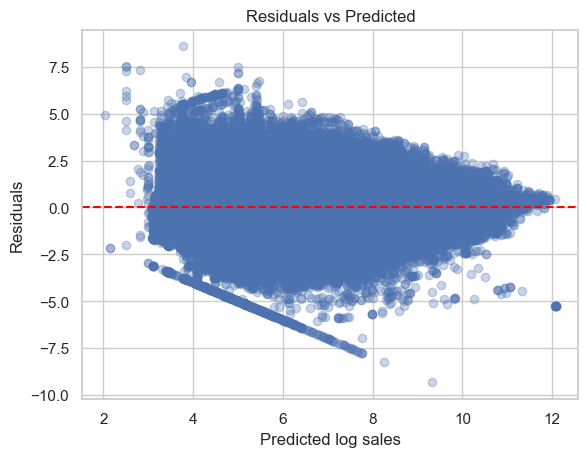

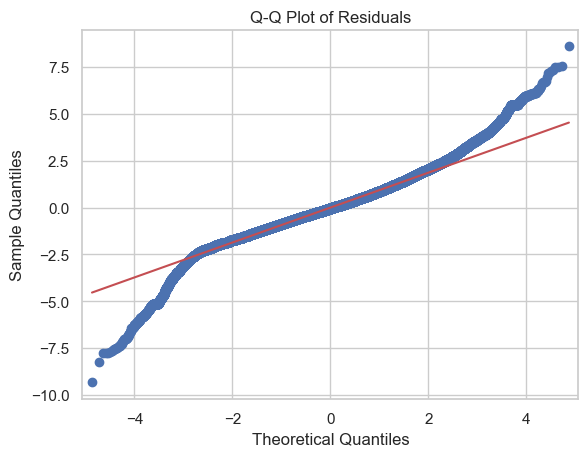

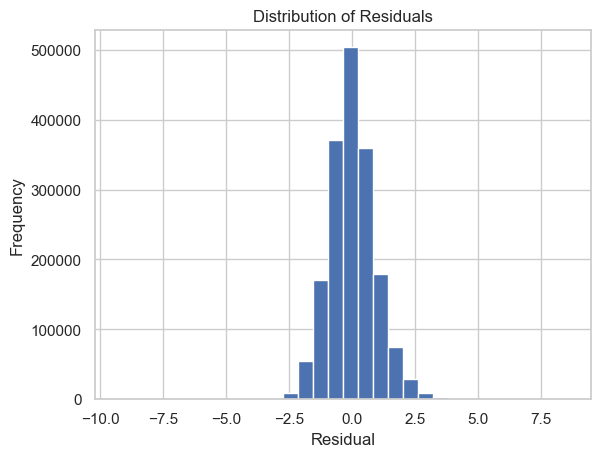

In [121]:
# Calculate predicted values and residuals from the fitted model
preds = model.predict(X_np)         # Predicted log sales values from the regression model
residuals = y_np - preds            # Residuals = actual - predicted values

# Plot residuals for predicted values
# This is used to check the assumption of homoscedasticity - the constant variance of residuals
plt.scatter(preds, residuals, alpha=0.3)     # Scatter plot of predicted values vs. residuals
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel("Predicted log sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Q-Q plot (Quantile-Quantile plot)
# Used to assess whether the residuals follow a normal distribution
sm.qqplot(residuals, line='s')     # 's' stands for standardised line
plt.title("Q-Q Plot of Residuals")
plt.show()

# Histogram of residuals
# To visually assess the distribution of residuals
plt.hist(residuals, bins=30)       
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame using the predictor matrix X_np and assign column names
X_vif = pd.DataFrame(X_np, columns=X.columns)  # X_np is the NumPy array of predictors with constant

# Initialise an empty DataFrame to store VIF results
vif_df = pd.DataFrame()

# Add the feature names to the result DataFrame
vif_df['feature'] = X_vif.columns

# Calculate VIF for each feature
# VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity
# A VIF > 10 generally indicates high multicollinearity and may require attention
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# The VIF results
print(vif_df)

                   feature           VIF
0                    const  2.047001e+06
1       value_cost_log_aud  1.566060e+00
2       value_quantity_log  1.888687e+00
3                     year  1.000028e+00
4                    month  1.002579e+00
5            item_type_2.0  1.087340e+00
6            item_type_3.0  1.035977e+00
7            item_type_4.0  1.247077e+00
8            item_type_5.0  4.958109e+00
9            item_type_6.0  2.752095e+00
10           item_type_7.0  6.174089e+00
11           item_type_8.0  1.083232e+00
12           item_type_9.0  2.250788e+00
13  bonus_group_code_Trade  2.057528e+00
14  business_area_code_920  3.119769e+00
15  business_area_code_930  1.049189e+00
16  business_area_code_940  3.421124e+00
17  business_area_code_945  1.382906e+00
18  business_area_code_950  1.899986e+00
19  business_area_code_960  1.308301e+00
20  business_area_code_970  3.689991e+00
21  business_area_code_980  1.157903e+01
22  business_area_code_985  2.289091e+00
23  business_are

## section 4.2 What explains cost variation?

In [124]:
# The group aims to identify what drives cost variation so we can find ways to optimize logistics, pricing, or supplier strategies

# Remove outliers using IQR
def remove_outliers(combined, group_cols, target_col):
    def iqr_filter(group):                                         # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        # Keep values within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
        return group[(group[target_col] >= Q1 - 1.5 * IQR) & (group[target_col] <= Q3 + 1.5 * IQR)]
    return combined.groupby(group_cols, group_keys=False).apply(iqr_filter)

# Apply IQR cleaning on all log-transformed variables
for col in ['value_sales_log_aud', 'value_cost_log_aud', 'value_quantity_log']:
    combined = remove_outliers(combined, ['item_type', 'business_area_code'], col)

# Select and preprocess relevant columns
cols = [
    'value_cost_log_aud', 'value_sales_log_aud', 'value_quantity_log',
    'item_type', 'bonus_group_code', 'business_area_code', 'year', 'month'
]
df_model = combined[cols].dropna()

# One-hot encode categorical variables
# Drop the first level of each category to avoid multicollinearity
df_encoded = pd.get_dummies(
    df_model,
    columns=['item_type', 'bonus_group_code', 'business_area_code'],
    drop_first=True
)

# Convert to numeric and drop rows with conversion issues
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce').dropna()

# Define X and y
y = df_encoded['value_cost_log_aud']
X = df_encoded.drop(columns='value_cost_log_aud')

# Add constant and convert to numpy arrays
X = sm.add_constant(X)
X_np = np.asarray(X).astype(np.float64)
y_np = np.asarray(y).astype(np.float64)

# Fit model
model = sm.OLS(y_np, X_np).fit()
print(model.summary())

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/3015550207.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/3015550207.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/3015550207.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                 3.245e+04
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:35:44   Log-Likelihood:            -2.7229e+06
No. Observations:             1702692   AIC:                         5.446e+06
Df Residuals:                 1702651   BIC:                         5.446e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6116      1.313     -0.466      0.6

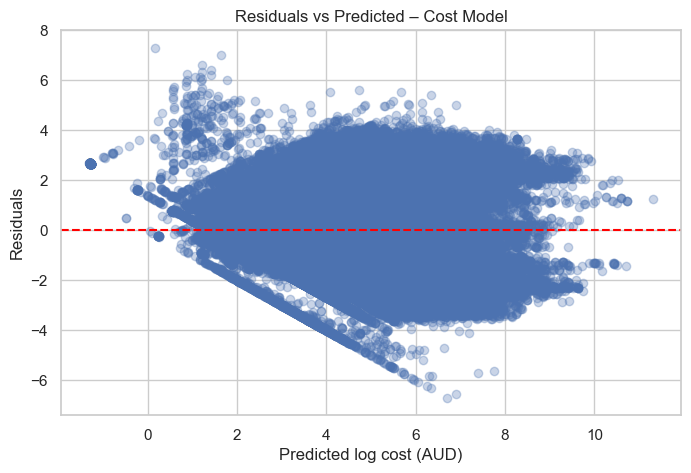

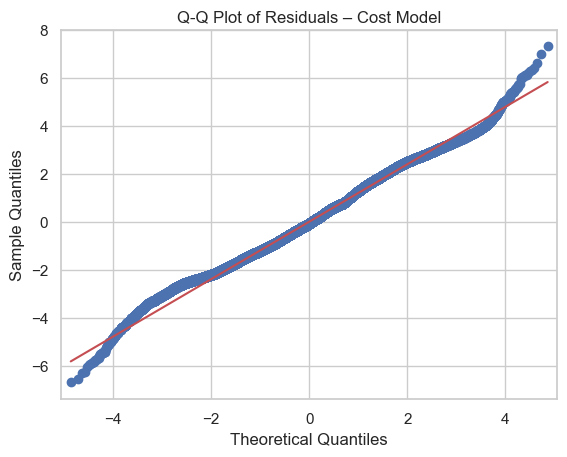

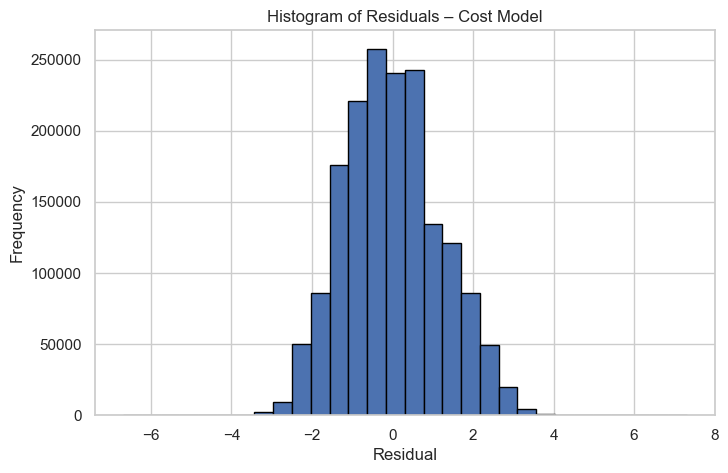

In [125]:
# Predict values and calculate residuals for the cost model
preds = model.predict(X_np)        # Predicted values from the regression model
residuals = y_np - preds           # Residuals = Actual - Predicted values

# Plot Residuals vs Predicted values
# This plot is used to check for homoscedasticity, the constant variance of residuals
plt.figure(figsize=(8, 5))
plt.scatter(preds, residuals, alpha=0.3)       # Scatter plot of predicted values vs residuals
plt.axhline(0, color='red', linestyle='--')    # Horizontal line at y = 0 for reference
plt.xlabel("Predicted log cost (AUD)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted – Cost Model")
plt.grid(True)
plt.show()

# Q-Q Plot
# To do the assess whether residuals are normally distributed
sm.qqplot(residuals, line='s')                 # 's' adds a standardized reference line
plt.title("Q-Q Plot of Residuals – Cost Model")
plt.grid(True)
plt.show()

# Histogram of Residuals
# It shows the distribution of residuals. Ideally and should resemble a normal (bell-shaped) curve
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')  
plt.title("Histogram of Residuals – Cost Model")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Re-create the design matrix for VIF calculation with proper column names
X_vif = pd.DataFrame(X_np, columns=X.columns)

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df['Feature'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display sorted VIF values
print(vif_df.sort_values(by='VIF', ascending=False))

                   Feature           VIF
0                    const  2.047744e+06
32  business_area_code_LMP  1.038757e+03
37  business_area_code_SUR  7.109416e+02
24  business_area_code_COM  4.109102e+02
33  business_area_code_OTH  3.985558e+02
25  business_area_code_DLT  2.168003e+02
27  business_area_code_FLD  1.998580e+02
39  business_area_code_TRO  7.898706e+01
38  business_area_code_TAL  7.358128e+01
36  business_area_code_SAE  6.566333e+01
40  business_area_code_URB  6.380476e+01
35  business_area_code_RWY  4.845581e+01
28  business_area_code_HLB  4.219136e+01
34  business_area_code_PEN  2.100757e+01
31  business_area_code_LCP  1.585986e+01
21  business_area_code_980  1.300689e+01
26  business_area_code_EXL  6.447034e+00
10           item_type_7.0  6.296360e+00
8            item_type_5.0  5.077041e+00
20  business_area_code_970  4.062374e+00
16  business_area_code_940  3.742663e+00
23  business_area_code_999  3.643974e+00
14  business_area_code_920  3.423582e+00
9            ite

## section 4.3 What impacts sales in Sydney vs. other regions? 

In [128]:
# The group aims to identify what drives sales differences between Sydney and other regions, 
# to find ways to tailor regional strategies and improve performance

# Remove outliers using IQR 
def remove_outliers(combined, group_cols, target_col):
    def iqr_filter(group):                                   # Calculate the 25th and 75th percentiles
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        # Keep only values within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
        return group[(group[target_col] >= Q1 - 1.5 * IQR) & (group[target_col] <= Q3 + 1.5 * IQR)]
    return combined.groupby(group_cols, group_keys=False).apply(iqr_filter)

# Apply to relevant columns
for col in ['value_sales_log_aud', 'value_cost_log_aud', 'value_quantity_log']:
    combined = remove_outliers(combined, ['item_type', 'business_area_code'], col)

# Create binary indicator for Sydney when 1 = Sydney and 0 = others
combined['is_Sydney'] = combined['country'].apply(lambda x: 1 if 'Sydney' in str(x) else 0)

# Select relevant variables
cols = [
    'value_sales_log_aud', 'value_cost_log_aud', 'value_quantity_log',
    'is_Sydney', 'item_type', 'bonus_group_code', 'business_area_code', 'year', 'month'
]
df_model = combined[cols].dropna()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df_model,
    columns=['item_type', 'bonus_group_code', 'business_area_code'],
    drop_first=True    # Avoid dummy variable trap
)

# Convert everything to numeric just in case
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce').dropna()

# Define X and y
y = df_encoded['value_sales_log_aud']
X = df_encoded.drop(columns='value_sales_log_aud')

# Add constant
X = sm.add_constant(X)
X_np = np.asarray(X).astype(np.float64)
y_np = np.asarray(y).astype(np.float64)

# Fit model
model = sm.OLS(y_np, X_np).fit()
print(model.summary())

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/164915007.py:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/164915007.py:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/qg/jvgdd0vs4vbbb1qbft6gq31c0000gn/T/ipykernel_26117/164915007.py:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping col

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                 6.221e+04
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:40:43   Log-Likelihood:            -2.2789e+06
No. Observations:             1699247   AIC:                         4.558e+06
Df Residuals:                 1699206   BIC:                         4.558e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6614      1.016      5.574      0.0

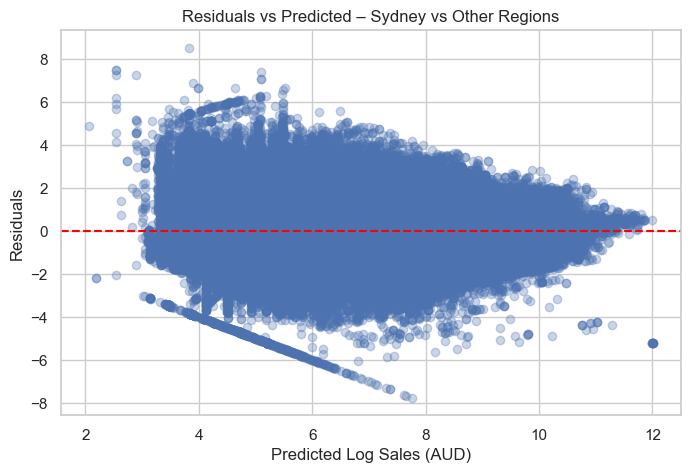

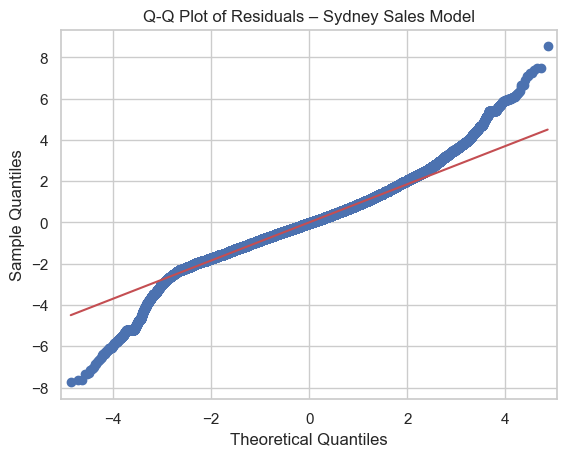

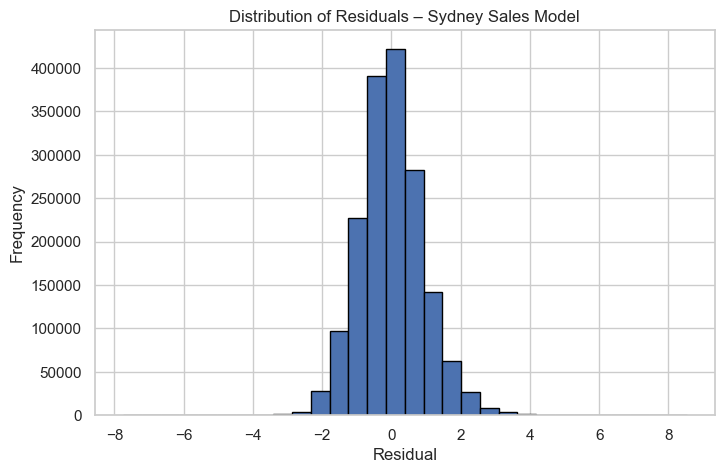

In [129]:
# Predicted values and residuals from the regression model
preds = model.predict(X_np)        # Predicted values of log sales
residuals = y_np - preds           # Residuals = Actual - Predicted values

# Plot Residuals vs Predicted values
# It checks for homoscedasticity which constant variance of residuals
# Residuals should be randomly scattered around 0 without a clear pattern
plt.figure(figsize=(8, 5))
plt.scatter(preds, residuals, alpha=0.3)        # Scatter plot of residuals vs predicted values
plt.axhline(0, color='red', linestyle='--')     # Reference line at y = 0
plt.xlabel("Predicted Log Sales (AUD)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted – Sydney vs Other Regions")
plt.grid(True)
plt.show()

# Q-Q Plot of residuals
# Used to assess whether the residuals are normally distributed.
# If the points lie close to the 45-degree line, the normality assumption is met.
sm.qqplot(residuals, line='s')                  # 's' adds a standard normal reference line
plt.title("Q-Q Plot of Residuals – Sydney Sales Model")
plt.grid(True)
plt.show()

# Histogram of residuals
# It shows the overall distribution of the residuals.
# A roughly symmetric, bell-shaped histogram supports the assumption of normality.
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')  
plt.title("Distribution of Residuals – Sydney Sales Model")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recreate X_vif DataFrame with correct column names
X_vif = pd.DataFrame(X_np, columns=X.columns)

# Calculate VIF for each predictor
vif_df = pd.DataFrame()
vif_df['Feature'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display sorted VIF table
print(vif_df.sort_values(by='VIF', ascending=False))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

invalid value encountered in scalar divide



                   Feature           VIF
0                    const  2.048085e+06
33  business_area_code_LMP  1.142404e+03
38  business_area_code_SUR  7.843191e+02
25  business_area_code_COM  4.529776e+02
34  business_area_code_OTH  4.394321e+02
26  business_area_code_DLT  2.392459e+02
28  business_area_code_FLD  2.204601e+02
40  business_area_code_TRO  8.713885e+01
39  business_area_code_TAL  8.105386e+01
37  business_area_code_SAE  7.242324e+01
41  business_area_code_URB  7.036278e+01
36  business_area_code_RWY  5.342079e+01
29  business_area_code_HLB  4.647187e+01
35  business_area_code_PEN  2.309442e+01
32  business_area_code_LCP  1.740804e+01
22  business_area_code_980  1.416387e+01
27  business_area_code_EXL  7.017208e+00
11           item_type_7.0  5.956893e+00
9            item_type_5.0  4.934445e+00
21  business_area_code_970  4.357144e+00
17  business_area_code_940  4.003907e+00
24  business_area_code_999  3.894454e+00
15  business_area_code_920  3.668374e+00
10           ite